# Analisis del dataset de jugadores transferidos

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression


In [2]:
GUARDAR = True

In [3]:
# df_total = pd.read_csv('df_merged_by-id.csv', low_memory=False)
df = pd.read_csv('df_merged_both_by_id.csv', low_memory=False)

In [4]:
# Reemplazar 0 por NaN antes de aplicar el logaritmo
df['lprecio'] = np.where(df['transfer_fee'] > 0, np.log(df['transfer_fee']), np.nan)
df['logprecio'] = np.log(df['transfer_fee']+1)
df['logvalor'] = np.log(df['market_value'])

df['lvalor_plantel_from'] = np.log(df['valor_plantel_from'])
df['lvalor_plantel_to'] = np.log(df['valor_plantel_to'])
df['lvalor_plantel_last'] = np.log(df['valor_plantel_last'])


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
print(df[['lvalor_plantel_from', 'lvalor_plantel_to', 'lvalor_plantel_last']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lvalor_plantel_from  830 non-null    float64
 1   lvalor_plantel_to    832 non-null    float64
 2   lvalor_plantel_last  826 non-null    float64
dtypes: float64(3)
memory usage: 19.8 KB
None


In [6]:
df.drop(columns=['player_id','code_from', 'code_to', 'season_stats'], inplace=True)

In [7]:
# Paso 1: Manejar los NaN temporalmente
# Si el valor medio del plantel es NaN, el tamaño del plantel no se calculará.
df['plantel_to'] = (df['valor_plantel_to'] / df['mean_plantel_to']).where(
    df['mean_plantel_to'].notna(), other=np.nan
)
df['plantel_from'] = (df['valor_plantel_from'] / df['mean_plantel_from']).where(
    df['mean_plantel_from'].notna(), other=np.nan
)
df['plantel_last'] = (df['valor_plantel_last'] / df['mean_plantel_last']).where(
    df['mean_plantel_last'].notna(), other=np.nan
)

# Paso 2: Convertir a enteros solo si no hay valores NaN
df['plantel_to'] = df['plantel_to'].round(0).astype('float64')  # Usa Int64 para soportar NaN
df['plantel_from'] = df['plantel_from'].round(0).astype('float64')
df['plantel_last'] = df['plantel_last'].round(0).astype('float64')

# Paso 3: Eliminar las variables redundantes
cols_to_drop = ['mean_plantel_to', 'mean_plantel_from', 'mean_plantel_last']
df = df.drop(columns=cols_to_drop)

# Confirmación de las nuevas columnas
print(df[['plantel_to', 'plantel_from', 'plantel_last']].info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   plantel_to    832 non-null    float64
 1   plantel_from  830 non-null    float64
 2   plantel_last  826 non-null    float64
dtypes: float64(3)
memory usage: 19.8 KB
None


In [8]:
df

player_name  age                  nationality  comunitario  \
0              Carlos Lampe   35     ['Bolivia', 'Argentina']            0   
1          Federico Andrada   28      ['Argentina', 'Italia']            1   
2                 Luis Mago   27  ['Venezuela', 'Inglaterra']            0   
3             Enzo Kalinski   35     ['Argentina', 'Polonia']            1   
4         Nicolás Fernández   26                ['Argentina']            0   
..                      ...  ...                          ...          ...   
835  Francisco Fydriszewski   31     ['Argentina', 'Polonia']            1   
836        Andrés Vombergar   29   ['Eslovenia', 'Argentina']            0   
837            Iker Muniain   31                   ['España']            1   
838            Agustín Giay   20                ['Argentina']            0   
839           Tobías Medina   20                ['Argentina']            0   

     extranjero              position  transfer_fee  season season_part  \
0             0               Portero             0    2022      verano   
1             0      Delantero centro             0    2022      verano   
2             1       Defensa central             0    2022      verano   
3             0           Mediocentro             0    2022      verano   
4             0      Delantero centro             0    2022      verano   
..          ...                   ...           ...     ...         ...   
835           0      Delantero centro             0    2024      verano   
836           0      Delantero centro             0    2024      verano   
837           1  Mediocentro ofensivo             0    2024      verano   
838           0       Lateral derecho       7000000    2024      verano   
839           0     Extremo izquierdo       1100000    2024      verano   

                     club_from  ... Lib_possession_Tkld_pct    lprecio  \
0           CA Vélez Sarsfield  ...                     NaN        NaN   
1        Club Atlético Tucumán  ...                     NaN        NaN   
2                  CD Ñublense  ...                     NaN        NaN   
3        AA Argentinos Juniors  ...                     NaN        NaN   
4    CA San Lorenzo de Almagro  ...                     NaN        NaN   
..                         ...  ...                     ...        ...   
835     Barcelona SC Guayaquil  ...                   500.0        NaN   
836                   Kalba FC  ...                     NaN        NaN   
837              Athletic Club  ...                     NaN        NaN   
838  CA San Lorenzo de Almagro  ...                     NaN  15.761421   
839  CA San Lorenzo de Almagro  ...                     NaN  13.910821   

     logprecio   logvalor  lvalor_plantel_from lvalor_plantel_to  \
0     0.000000  12.834681            18.170680         16.691896   
1     0.000000  13.422468            16.691896         16.277660   
2     0.000000  13.384728            15.796512         17.047500   
3     0.000000  11.918391            17.527862         16.513510   
4     0.000000  14.771022            17.916500         17.273403   
..         ...        ...                  ...               ...   
835   0.000000  13.997832            16.685680         17.347151   
836   0.000000  14.914123            16.887278         17.347151   
837   0.000000  15.424948            19.504687         17.347151   
838  15.761421  15.894952            17.347151         18.607160   
839  13.910822  12.072541            17.347151         17.081270   

    lvalor_plantel_last plantel_to plantel_from plantel_last  
0             15.687313       46.0         44.0         36.0  
1             16.551824       39.0         46.0         44.0  
2             16.403275       49.0         37.0         40.0  
3             17.691906       41.0         45.0         46.0  
4             17.916500       58.0         51.0         51.0  
..                  ...        ...          ...          ...  
835           16.685680       4

In [9]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 928 columns):
 #    Column                                         Non-Null Count  Dtype  
---   ------                                         --------------  -----  
 0    player_name                                    840 non-null    object 
 1    age                                            840 non-null    int64  
 2    nationality                                    840 non-null    object 
 3    comunitario                                    840 non-null    int64  
 4    extranjero                                     840 non-null    int64  
 5    position                                       840 non-null    object 
 6    transfer_fee                                   840 non-null    int64  
 7    season                                         840 non-null    int64  
 8    season_part                                    840 non-null    object 
 9    club_from                                

In [10]:
df.describe()

age  comunitario  extranjero  transfer_fee       season  \
count  840.000000   840.000000  840.000000  8.400000e+02   840.000000   
mean    28.070238     0.266667    0.254762  9.835155e+05  2022.819048   
std      4.629652     0.442480    0.435987  2.656758e+06     0.711304   
min     18.000000     0.000000    0.000000  0.000000e+00  2022.000000   
25%     24.000000     0.000000    0.000000  0.000000e+00  2022.000000   
50%     28.000000     0.000000    0.000000  0.000000e+00  2023.000000   
75%     32.000000     1.000000    1.000000  9.162500e+05  2023.000000   
max     40.000000     1.000000    1.000000  4.425000e+07  2024.000000   

       market_value      altura  Internacional_pj_ant  Local_pj_ant  \
count  8.380000e+02  839.000000            833.000000    832.000000   
mean   1.470495e+06  179.265793              2.026411     24.466346   
std    2.096915e+06    6.513409              3.133914     11.142932   
min    2.500000e+04  159.000000              0.000000      1.000000   
25%    3.000000e+05  175.000000              0.000000     16.000000   
50%    6.500000e+05  179.000000              0.000000     25.000000   
75%    1.800000e+06  184.000000              3.000000     33.000000   
max    1.600000e+07  197.000000             13.000000     58.000000   

       Internacional_Goals_ant  ...  Lib_possession_Tkld_pct     lprecio  \
count               833.000000  ...               103.000000  309.000000   
mean                  0.234094  ...               159.474757   14.214362   
std                   0.818470  ...               165.146401    1.095717   
min                   0.000000  ...                 0.000000   10.878047   
25%                   0.000000  ...                53.550000   13.453105   
50%                   0.000000  ...               100.000000   14.285514   
75%                   0.000000  ...               200.000000   14.978661   
max                   8.000000  ...              1000.000000   17.605366   

        logprecio    logvalor  lvalor_plantel_from  lvalor_plantel_to  \
count  840.000000  838.000000           830.000000         832.000000   
mean     5.228855   13.446848            16.897087          16.850109   
std      6.890621    1.260976             0.892576           1.095583   
min      0.000000   10.126631            13.864301          10.126631   
25%      0.000000   12.611538            16.281914          16.188554   
50%      0.000000   13.384728            16.890516          16.947957   
75%     13.728046   14.403297            17.444308          17.482400   
max     17.605366   16.588099            20.863028          20.733216   

       lvalor_plantel_last  plantel_to  plantel_from  plantel_last  
count           826.000000  832.000000    830.000000    826.000000  
mean             16.900140   42.646635     43.719277     43.950363  
std               0.816388    7.344711      6.790292      7.093058  
min              12.206073   12.000000     27.000000     25.000000  
25%              16.281914   37.000000     39.000000     39.000000  
50%              16.890516   43.000000     44.000000     44.000000  
75%              17.419649   47.250000     48.000000     49.000000  
max              19.504687   63.000000     70.000000     74.000000  

[8 rows x 891 columns]

In [11]:
# Obtener estadísticas descriptivas por posición para columnas específicas
estadisticas_por_posicion = df.groupby('posicion')[['age', 'transfer_fee', 'market_value', 'altura']].describe()
estadisticas_por_posicion

age                                                     \
             count       mean       std   min   25%   50%   75%   max   
posicion                                                                
Defensa      264.0  27.878788  4.343660  19.0  24.0  28.0  32.0  38.0   
Delantero    281.0  27.708185  4.693488  18.0  24.0  27.0  31.0  39.0   
Medio campo  244.0  28.032787  4.713058  19.0  24.0  28.0  32.0  39.0   
Portero       51.0  31.235294  4.235980  23.0  28.0  31.0  34.0  40.0   

            transfer_fee                ... market_value             altura  \
                   count          mean  ...          75%         max  count   
posicion                                ...                                   
Defensa            264.0  6.204962e+05  ...    1500000.0   8000000.0  264.0   
Delantero          281.0  1.229260e+06  ...    2300000.0  16000000.0  281.0   
Medio campo        244.0  1.246336e+06  ...    2000000.0  15000000.0  243.0   
Portero             51.0  2.512549e+05  ...     800000.0   6000000.0   51.0   

                                                                      
                   mean       std    min    25%    50%    75%    max  
posicion                                                              
Defensa      181.060606  6.406695  165.0  177.0  181.0  185.0  197.0  
Delantero    178.907473  6.086165  165.0  174.0  179.0  183.0  194.0  
Medio campo  176.205761  5.684440  159.0  173.0  177.0  180.0  188.0  
Portero      186.529412  3.775463  178.0  184.0  186.0  189.0  193.0  

[4 rows x 32 columns]

In [12]:
# Crear la variable binaria 'tiene_precio'
df['tiene_precio'] = (df['transfer_fee'] > 0).astype(int)

# Filtrar las columnas que comienzan con 'stats_'
stats_columns = [col for col in df.columns if col.startswith('def')]

# Filtrar el DataFrame para incluir solo estas columnas y la variable categórica
df_stats = df[['tiene_precio', 'n_transfer_date'] + stats_columns]

# Agrupar por 'tiene_precio' y calcular estadísticas descriptivas solo para las columnas filtradas
describe_by_precio_stats = df_stats.groupby('tiene_precio').describe()

# Mostrar estadísticas descriptivas para cada grupo de 'tiene_precio'
for tiene_precio, group in df_stats.groupby('tiene_precio'):
    print(f"\nEstadísticas para tiene_precio = {tiene_precio}")
    display(group.describe())



Estadísticas para tiene_precio = 0


tiene_precio  n_transfer_date  defense_Tkl  defense_TklW  \
count         531.0       531.000000   423.000000    461.000000   
mean            0.0         4.099812    23.274232     13.802603   
std             0.0         1.317309    22.264150     13.503062   
min             0.0         2.000000     0.000000      0.000000   
25%             0.0         3.000000     5.500000      3.000000   
50%             0.0         4.000000    17.000000     10.000000   
75%             0.0         5.000000    36.000000     21.000000   
max             0.0         6.000000   121.000000     79.000000   

       defense_Def_3rd  defense_Mid_3rd  defense_Att_3rd  defense_Tkl_OonO  \
count       423.000000       423.000000       423.000000        423.000000   
mean         10.617021        10.078014         2.579196         11.104019   
std          12.308433        10.075124         2.965479         11.171798   
min           0.000000         0.000000         0.000000          0.000000   
25%           1.000000         2.000000         0.000000          2.000000   
50%           6.000000         7.000000         2.000000          8.000000   
75%          16.000000        15.000000         4.000000         18.000000   
max          82.000000        50.000000        15.000000         69.000000   

       defense_Att  defense_Lost  ...  defense_Att_overPT90  \
count   423.000000    423.000000  ...            422.000000   
mean     24.120567     13.016548  ...              1.797627   
std      22.475835     12.709746  ...              1.236862   
min       0.000000      0.000000  ...              0.000000   
25%       6.500000      3.500000  ...              1.000000   
50%      18.000000      9.000000  ...              1.652483   
75%      38.000000     19.000000  ...              2.386905   
max     120.000000     71.000000  ...             10.000000   

       defense_Lost_overPT90  defense_Blocks_overPT90  defense_Sh_overPT90  \
count             422.000000               422.000000           422.000000   
mean                1.004867                 1.062004             0.280022   
std                 0.917395                 0.770621             0.469997   
min                 0.000000                 0.000000             0.000000   
25%                 0.442603                 0.625000             0.000000   
50%                 0.869565                 1.013181             0.146522   
75%                 1.299004                 1.388889             0.391520   
max                10.000000                 6.666667             5.000000   

       defense_Pass_overPT90  defense_Int_overPT90  \
count             422.000000            460.000000   
mean                0.781982              1.000579   
std                 0.598462              0.869926   
min                 0.000000              0.000000   
25%                 0.408648              0.277778   
50%                 0.695372              0.877603   
75%                 1.074309              1.521797   
max                 4.621795              4.726764   

       defense_Tkl_plus_Int_overPT90  defense_Clr_overPT90  \
count                     422.000000            422.000000   
mean                        2.627933              1.779452   
std                         1.683832              1.705479   
min                         0.000000              0.000000   
25%                         1.237158              0.585371   
50%                         2.732684              1.179336   
75%                         3.750000              2.585165   
max                        10.975189             12.000000   

       defense_Err_overPT90  defense_Tkl_pct  
count            422.000000       401.000000  
mean               0.030002        44.636160  
std                0.251248        22.152411  
min                0.000000         0.000000  
25%                0.000000        32.500000  
50%                0.000000        43.300000  
75%                0.000000        57.900000  
max    


Estadísticas para tiene_precio = 1


tiene_precio  n_transfer_date  defense_Tkl  defense_TklW  \
count         309.0       309.000000   242.000000    269.000000   
mean            1.0         4.284790    32.859504     19.988848   
std             0.0         1.315416    26.276318     16.159301   
min             1.0         2.000000     0.000000      0.000000   
25%             1.0         3.000000    12.000000      8.000000   
50%             1.0         4.000000    28.000000     16.000000   
75%             1.0         5.000000    46.750000     30.000000   
max             1.0         6.000000   143.000000     85.000000   

       defense_Def_3rd  defense_Mid_3rd  defense_Att_3rd  defense_Tkl_OonO  \
count       242.000000       242.000000       242.000000        242.000000   
mean         13.975207        14.392562         4.491736         15.561983   
std          14.154431        12.369771         4.035364         13.815256   
min           0.000000         0.000000         0.000000          0.000000   
25%           2.250000         6.000000         1.000000          5.000000   
50%           9.000000        12.000000         4.000000         13.000000   
75%          22.000000        20.000000         6.750000         23.750000   
max          74.000000        66.000000        20.000000         91.000000   

       defense_Att  defense_Lost  ...  defense_Att_overPT90  \
count   242.000000    242.000000  ...            242.000000   
mean     33.628099     18.066116  ...              1.877044   
std      25.816342     13.860739  ...              1.265271   
min       0.000000      0.000000  ...              0.000000   
25%      14.000000      7.000000  ...              1.146427   
50%      31.000000     16.000000  ...              1.782428   
75%      44.000000     25.000000  ...              2.399415   
max     158.000000     67.000000  ...             10.000000   

       defense_Lost_overPT90  defense_Blocks_overPT90  defense_Sh_overPT90  \
count             242.000000               242.000000           242.000000   
mean                1.061307                 1.144507             0.222417   
std                 1.029219                 0.828617             0.267394   
min                 0.000000                 0.000000             0.000000   
25%                 0.580131                 0.777329             0.000000   
50%                 0.893558                 1.057184             0.132456   
75%                 1.356130                 1.393734             0.329791   
max                10.000000                10.000000             1.666667   

       defense_Pass_overPT90  defense_Int_overPT90  \
count             242.000000            269.000000   
mean                0.922090              0.917859   
std                 0.795612              0.724231   
min                 0.000000              0.000000   
25%                 0.543972              0.278746   
50%                 0.857143              0.815217   
75%                 1.153094              1.483051   
max                10.000000              3.523810   

       defense_Tkl_plus_Int_overPT90  defense_Clr_overPT90  \
count                     242.000000            242.000000   
mean                        2.697170              1.581390   
std                         1.664450              1.508290   
min                         0.000000              0.000000   
25%                         1.518255              0.504170   
50%                         2.591591              1.116411   
75%                         3.661372              2.038148   
max                        10.000000              8.961800   

       defense_Err_overPT90  defense_Tkl_pct  
count            242.000000       234.000000  
mean               0.012808        43.613675  
std                0.032146        17.858218  
min                0.000000         0.000000  
25%                0.000000        33.300000  
50%                0.000000        43.200000  
75%                0.000000        56.500000  
max    

In [15]:
# Crear las categorías de transacciones
df['tipo_transaccion'] = 'NA'
df.loc[(df['carg'] == 1) & (df['varg'] == 0), 'tipo_transaccion'] = 'Importaciones'
df.loc[(df['carg'] == 1) & (df['varg'] == 1), 'tipo_transaccion'] = 'Locales'
df.loc[(df['carg'] == 0) & (df['varg'] == 1), 'tipo_transaccion'] = 'Exportaciones'

# Calcular los promedios por tipo de transacción y posición
promedios = df.pivot_table(
   values='transfer_fee',
   index='posicion',
   columns='tipo_transaccion',
   aggfunc='mean',
   margins=True,
   margins_name='Total'
).round(1)

# Ordenar las columnas si es necesario
orden_columnas = ['Importaciones', 'Locales', 'Exportaciones', 'Total']
promedios = promedios[orden_columnas]

print("Promedios de transfer_fee por tipo de transacción y posición:")

display(promedios)

Promedios de transfer_fee por tipo de transacción y posición:


tipo_transaccion  Importaciones   Locales  Exportaciones      Total
posicion                                                           
Defensa                457960.0  298833.3      1199876.5   620496.2
Delantero              833602.3  607587.0      2140267.3  1229259.8
Medio campo            652234.4  389634.4      2599160.9  1246336.1
Portero                280000.0  260480.0       204769.2   251254.9
Total                  637862.5  411698.1      1922503.5   983515.5

In [16]:
from sklearn.preprocessing import OneHotEncoder
# Procesar 'posicion' con múltiples categorías (dividir en columnas binarias)
posicion_expanded = df['posicion'].str.get_dummies(sep=', ')
seas_p_expanded = df['season_part'].str.get_dummies(sep=', ')
df = pd.concat([df, posicion_expanded, seas_p_expanded], axis=1)
df.drop(['Born', 'Age'], axis=1, inplace=True)  # Eliminar la columna original si ya no es necesaria

# # Aplicar OneHotEncoder a las otras columnas
# encoder = OneHotEncoder(sparse=False)
# # Seleccionar las columnas categóricas con categorías únicas
# categorical_columns = ['season_part', 'pie', 'division_to', 'division_from', 'division_last']
# # Ajustar y transformar el OneHotEncoder
# encoded_data = encoder.fit_transform(df[categorical_columns])
# # Convertir el resultado a un DataFrame
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
# # Concatenar los datos codificados con el DataFrame original
# df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
# df

In [17]:
numeric_cols = df.describe().columns.to_list()

In [18]:
# Crear un nuevo DataFrame excluyendo columnas que empiezan con "Lib_"
# df = df.loc[:, ~df.columns.str.startswith("Lib_")]
df = df.loc[:, ~df.columns.str.startswith("ccl")]
df = df.loc[:, ~df.columns.str.startswith("vcl")]
df = df.loc[:, ~df.columns.str.endswith("_act")]
# df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith("keepers")]

# 1. Eliminar columnas que contengan 'Conceded'
columnas_a_eliminar = [col for col in df.columns if 'Conceded' in col]
df = df.drop(columns=columnas_a_eliminar)

# 2. Identificar columnas que necesitan ser llenadas con 0 para no porteros
columnas_keepers = [col for col in df.columns if col.startswith('keepers') and '%' not in col]
columnas_clean_sheets = [col for col in df.columns if 'Clean Sheets' in col]

# Combinar todas las columnas a llenar
columnas_a_llenar = columnas_keepers + columnas_clean_sheets

# Llenar con 0 las columnas identificadas solo para jugadores que no son porteros
for columna in columnas_a_llenar:
    mascara = df['posicion'] != 'Portero'
    df.loc[mascara, columna] = df.loc[mascara, columna].fillna(0)



In [19]:

# Generar la matriz de correlación
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

# colormap = plt.cm.RdBu
# plt.figure(figsize=(12, 12))
# plt.title('Correlación de Pearson entre Features sin columnas "Lib_"', y=1.05, size=15)


# # Graficar la matriz de correlación
# sns.heatmap(correlation_matrix, linewidths=0.1, vmax=1.0, square=True, 
#             cmap=colormap, linecolor='white', annot=True, cbar_kws={"shrink": .8})
# plt.show()

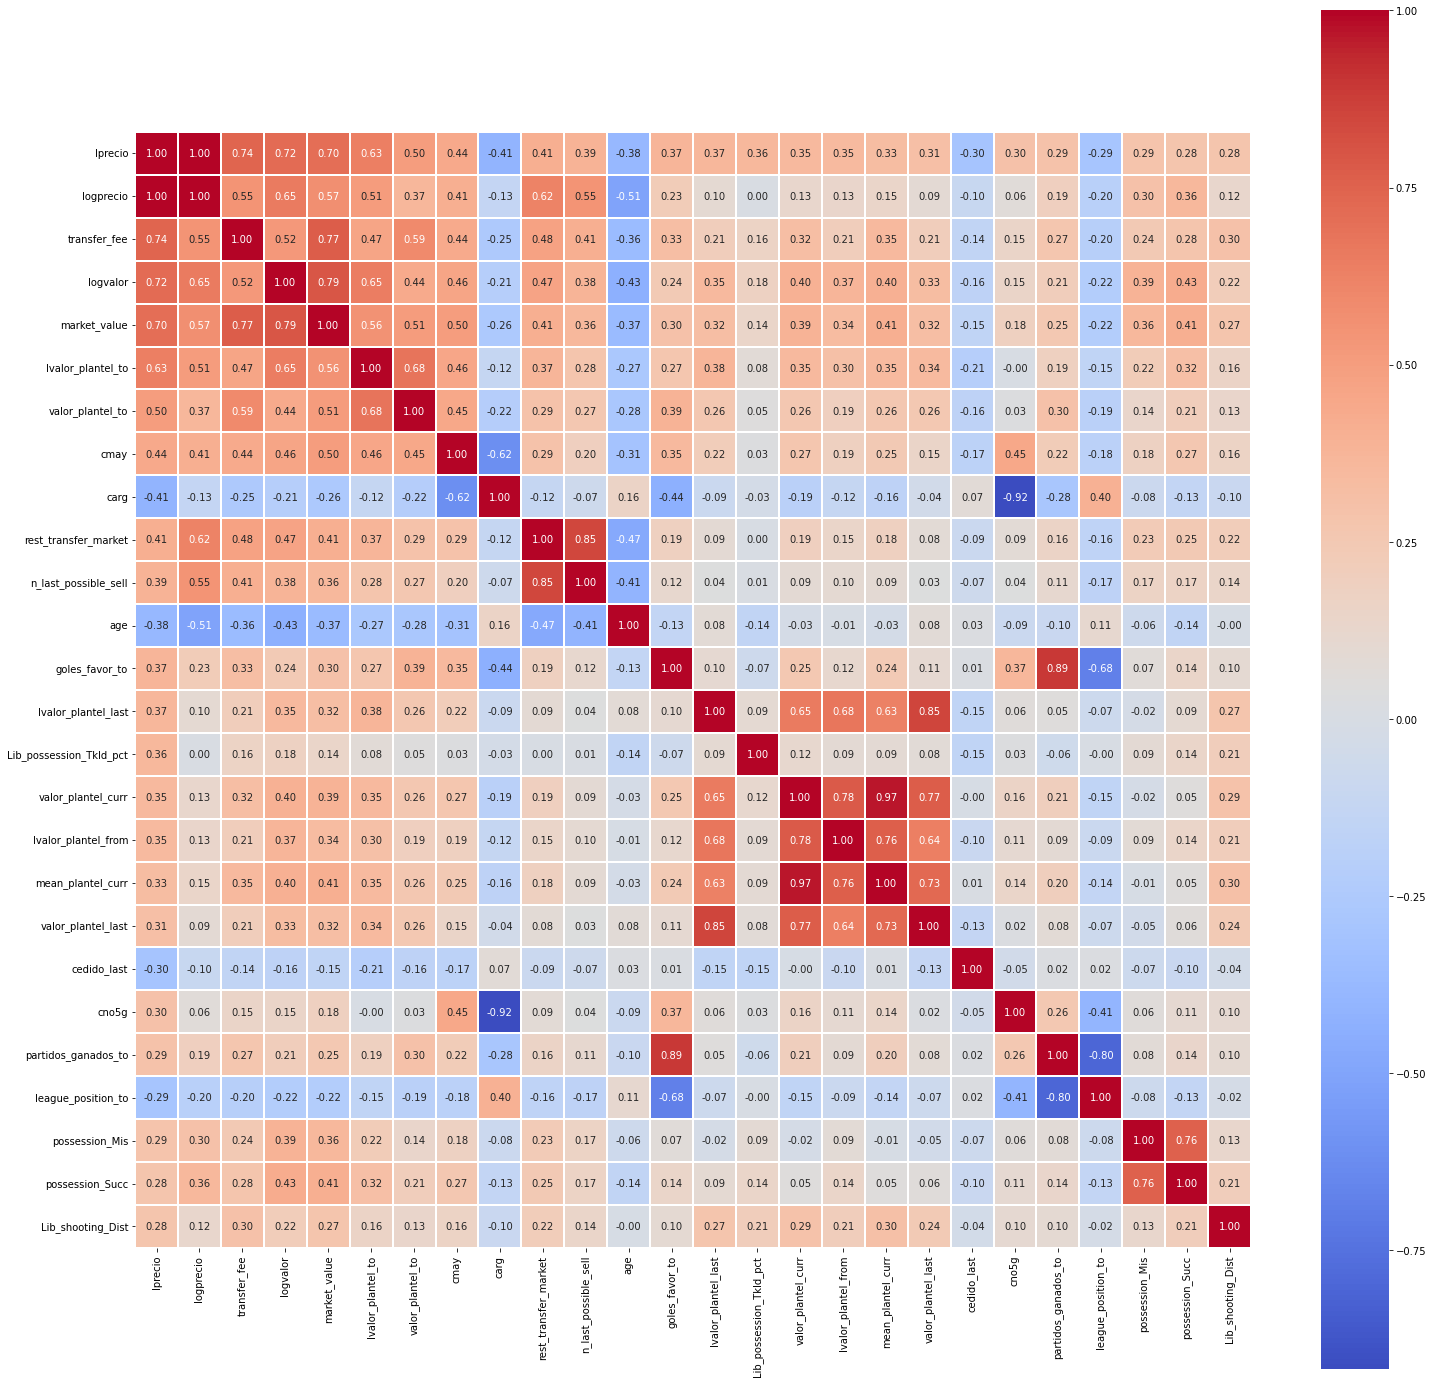

In [20]:

# Supongamos que `correlation_matrix` es la matriz de correlación de tu dataset completo
# Calcular las correlaciones con las columnas "logprecio " y "logprecio recio"
correlation_with_lprecio  = correlation_matrix['lprecio'].abs().sort_values(ascending=False)
correlation_with_logprecio = correlation_matrix['logprecio'].abs().sort_values(ascending=False)

# Seleccionar las 25 columnas con mayor correlación con "logprecio " y "logprecio recio"
# Excluyendo las propias "logprecio " y "logprecio recio" de los resultados finales
top_columns_lprecio  = correlation_with_lprecio .drop(['lprecio']).head(25).index
top_columns_logprecio = correlation_with_logprecio.drop(['logprecio']).head(25).index

# Unir las columnas top primero
remaining_columns = top_columns_lprecio.union(top_columns_lprecio)

# Crear el orden final de columnas con logprecio  y logprecio recio al principio
final_columns = ['lprecio', 'logprecio'] + [col for col in remaining_columns 
                                              if col not in ['lprecio', 'logprecio']]

# Generar el heatmap de las columnas seleccionadas
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix.loc[final_columns, final_columns], 
            linewidths=0.1, vmax=1.0, square=True, 
            cmap="coolwarm", linecolor='white', annot=True, fmt=".2f")
plt.show()

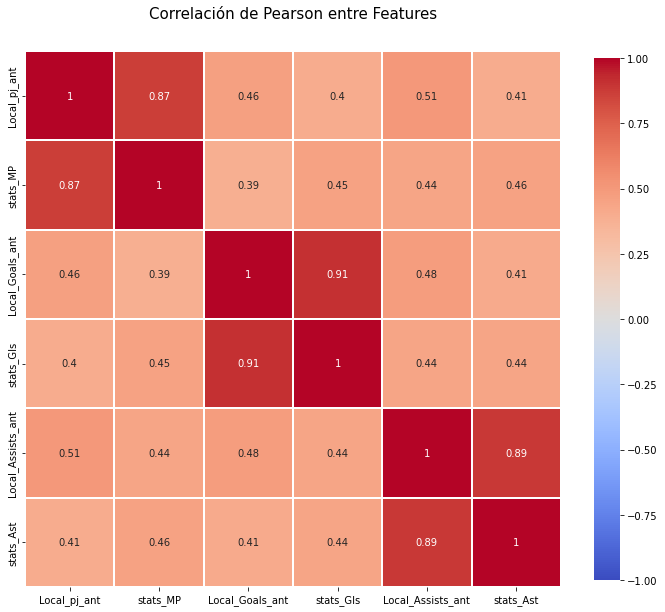

In [21]:
# Crear un nuevo DataFrame excluyendo columnas que empiezan con "Lib_"
# df_filtered = df.loc[:, ~df.columns.str.startswith("Lib_")]


colormap = plt.cm.RdBu
plt.figure(figsize=(12, 12))
plt.title('Correlación de Pearson entre Features', y=1.05, size=15)

# Generar la matriz de correlación
correlation_matrix = df[['Local_pj_ant', 'stats_MP', 'Local_Goals_ant', 'stats_Gls', 'Local_Assists_ant', 'stats_Ast']].select_dtypes(include=[float, int]).corr()

# Graficar la matriz de correlación
sns.heatmap(correlation_matrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, 
            cmap="coolwarm", linecolor='white', annot=True, cbar_kws={"shrink": .8})
plt.show()

In [22]:
abs(df['Local_pj_ant']-df['stats_MP']).mean()

np.float64(2.766826923076923)

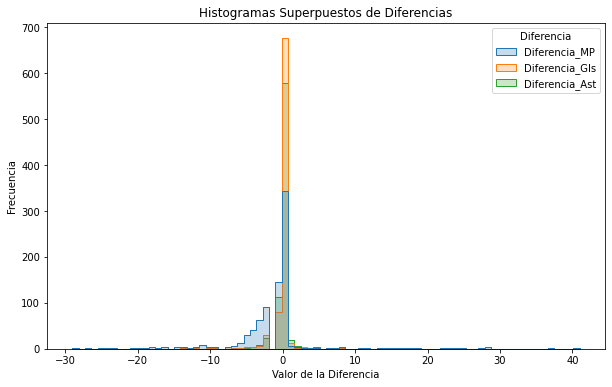

In [23]:
# sns.histplot(data=abs(df['Local_pj_ant']-df['stats_MP']))
#'Local_pj_ant', 'stats_MP', 'Local_Goals_ant', 'stats_Gls', 'Local_Assists_ant', 'stats_Ast'


# Calcular las diferencias entre las columnas correspondientes
df['Diferencia_MP'] = df['stats_MP'] - df['Local_pj_ant']
df['Diferencia_Gls'] = df['stats_Gls'] - df['Local_Goals_ant']
df['Diferencia_Ast'] = df['stats_Ast'] - df['Local_Assists_ant']

# Convertir las diferencias a un formato largo (long format) para facilitar el uso del parámetro hue
df_long = pd.melt(df, value_vars=['Diferencia_MP', 'Diferencia_Gls', 'Diferencia_Ast'], 
                  var_name='Diferencia', value_name='Valor')

# Crear el histograma con superposición de las tres diferencias
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long, x='Valor', hue='Diferencia', element="step",  bins=80)

# Configuración del gráfico
plt.title("Histogramas Superpuestos de Diferencias")
plt.xlabel("Valor de la Diferencia")
plt.ylabel("Frecuencia")
plt.show()


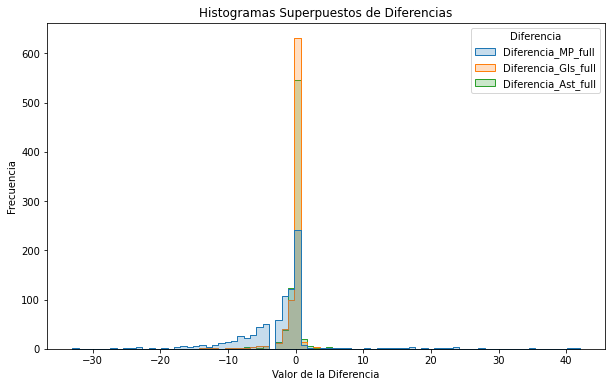

In [24]:
# sns.histplot(data=abs(df['Local_pj_ant']-df['stats_MP']))
#'Local_pj_ant', 'stats_MP', 'Local_Goals_ant', 'stats_Gls', 'Local_Assists_ant', 'stats_Ast'


# Calcular las diferencias entre las columnas correspondientes
df['Diferencia_MP_full'] = df['stats_MP'] + df['Lib_stats_MP'] - df['Local_pj_ant'] - df['Internacional_pj_ant'] 
df['Diferencia_Gls_full'] = df['stats_Gls'] + df['Lib_stats_Gls'] - df['Local_Goals_ant']- df['Internacional_Goals_ant'] 
df['Diferencia_Ast_full'] = df['stats_Ast'] + df['Lib_stats_Ast'] - df['Local_Assists_ant']- df['Internacional_Assists_ant'] 

# Convertir las diferencias a un formato largo (long format) para facilitar el uso del parámetro hue
df_long = pd.melt(df, value_vars=['Diferencia_MP_full', 'Diferencia_Gls_full', 'Diferencia_Ast_full'], 
                  var_name='Diferencia', value_name='Valor')

# Crear el histograma con superposición de las tres diferencias
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long, x='Valor', hue='Diferencia', element="step",  bins=80)

# Configuración del gráfico
plt.title("Histogramas Superpuestos de Diferencias")
plt.xlabel("Valor de la Diferencia")
plt.ylabel("Frecuencia")
plt.show()


In [25]:
# Definir stats_by90
stats_by90 = False  # Cambia esto a False si quieres las estadísticas totales

# Prefijos de los grupos variables
prefijos = ['stats_', 'shooting_', 'passing_', 'passing_types_', 'gca_', 
            'defense_', 'possession_', 'playingtime_', 'misc_', 'Lib_']

# Identificar las columnas que empiezan con los prefijos dados
cols_to_check = []
for prefijo in prefijos:
    cols_to_check.extend([col for col in df.columns if col.startswith(prefijo)])

if stats_by90:
    # Mantener solo las columnas que contienen '90'
    cols_to_drop = [col for col in cols_to_check 
                    if '90' not in col
                    and col not in ['Lib_playingtime_PPM','playingtime_PPM']]
else:
    # Mantener las columnas que no contienen '90', excepto las específicas
    cols_to_drop = [col for col in cols_to_check 
                   if '90' in col 
                   and col not in ['stats_90s', 'playingtime_90s', 'Lib_stats_90s', 'Lib_playingtime_90s']]

# Eliminar las columnas seleccionadas
df = df.drop(columns=cols_to_drop)

Index(['logprecio', 'logvalor', 'age', 'altura', 'stats_MP', 'stats_Starts',
       'stats_Min', 'stats_90s', 'stats_Gls', 'stats_Ast', 'stats_G_plus_A',
       'stats_G_minus_PK', 'stats_PK', 'stats_PKatt', 'stats_CrdY',
       'stats_CrdR', 'stats_xG', 'stats_npxG', 'stats_xAG',
       'stats_npxG_plus_xAG', 'stats_PrgC', 'stats_PrgP', 'stats_PrgR'],
      dtype='object')


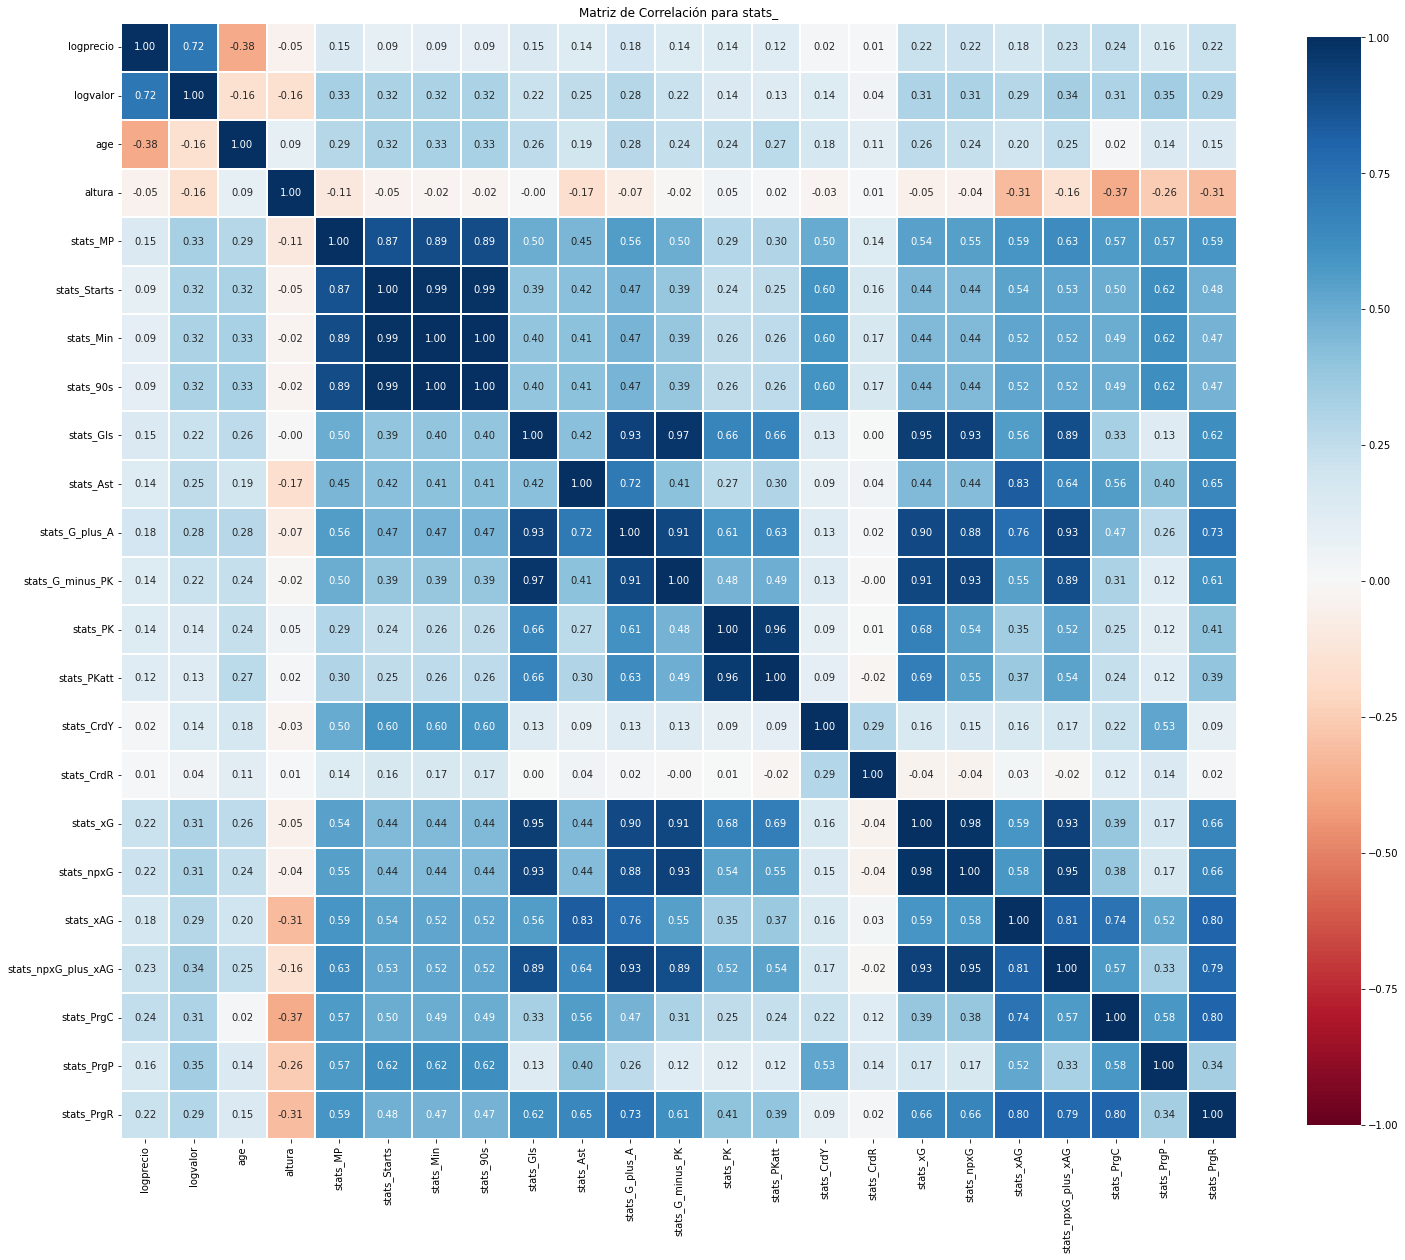

Index(['logprecio', 'logvalor', 'age', 'altura', 'shooting_Gls', 'shooting_Sh',
       'shooting_SoT', 'shooting_G_over_Sh', 'shooting_G_over_SoT',
       'shooting_Dist', 'shooting_PK', 'shooting_PKatt', 'shooting_FK',
       'shooting_xG', 'shooting_npxG', 'shooting_npxG_over_Sh',
       'shooting_G_minus_xG', 'shooting_np_G_minus_xG', 'shooting_SoT_pct'],
      dtype='object')


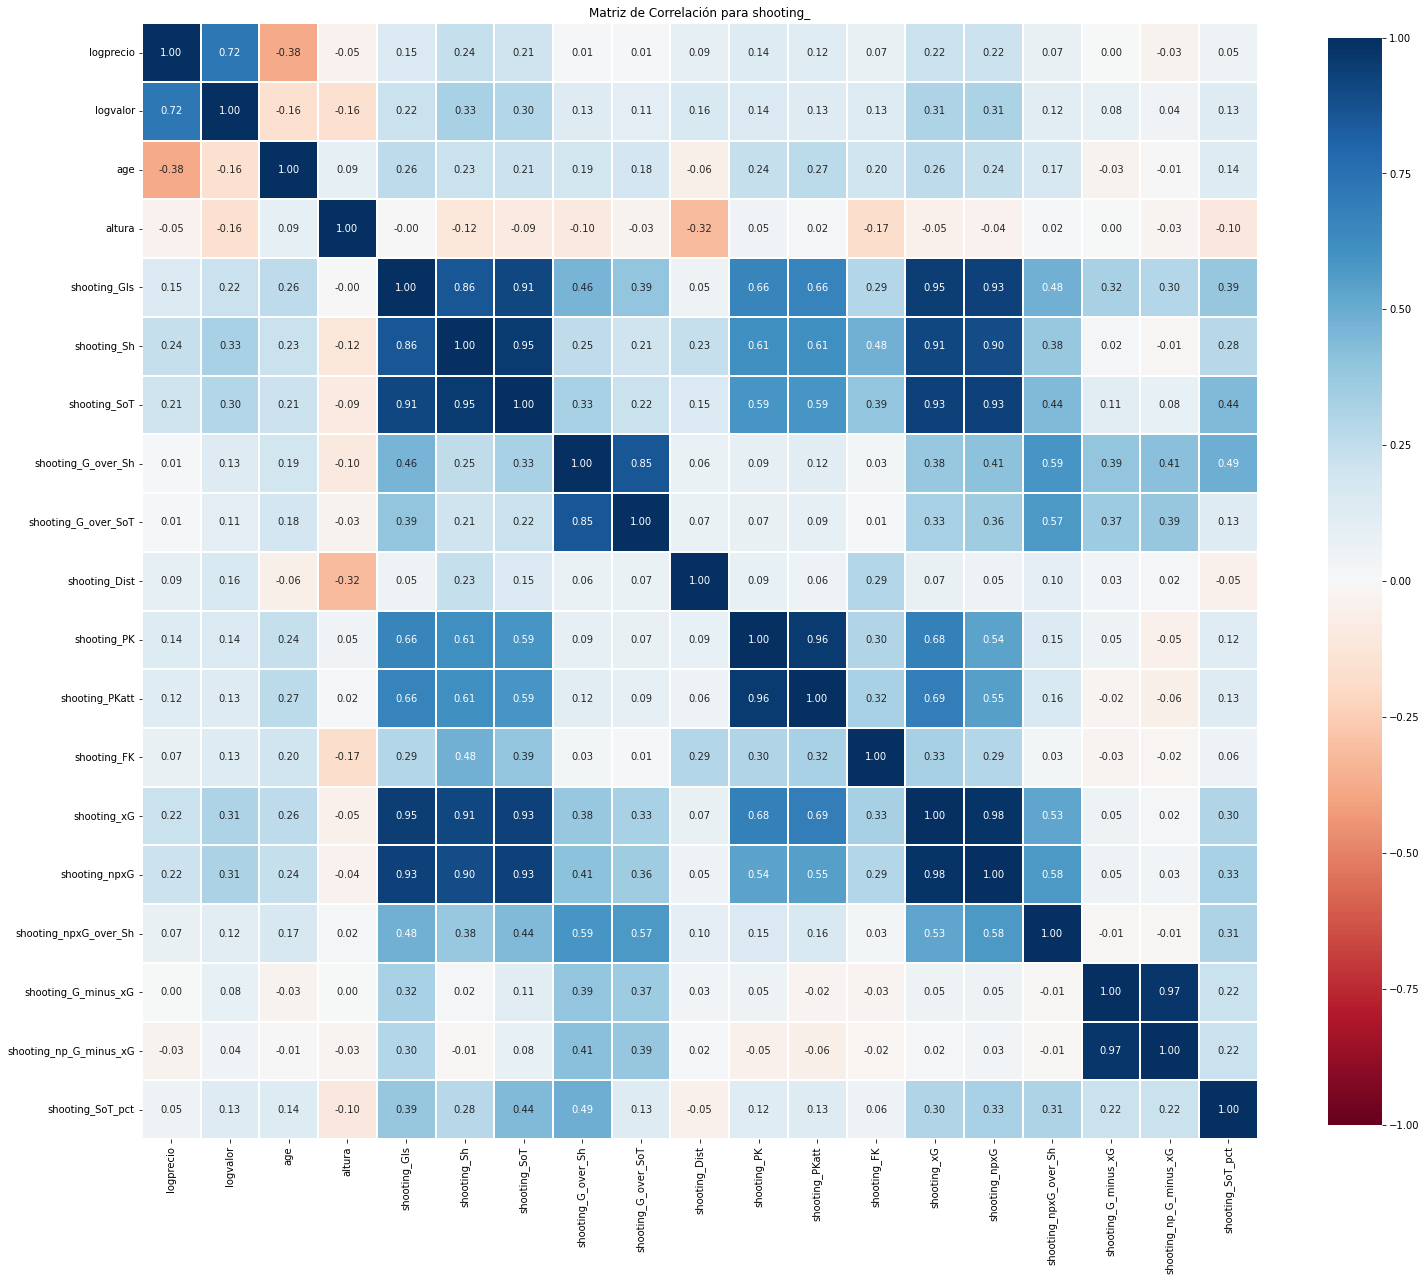

Index(['logprecio', 'logvalor', 'age', 'altura', 'passing_Cmp', 'passing_Att',
       'passing_TotDist', 'passing_PrgDist', 'passing_Cmp_short',
       'passing_Att_short', 'passing_Cmp_mid', 'passing_Att_mid',
       'passing_Cmp_long', 'passing_Att_long', 'passing_Ast', 'passing_xAG',
       'passing_xA', 'passing_A_minus_xAG', 'passing_KP', 'passing_1_over_3',
       'passing_PPA', 'passing_CrsPA', 'passing_PrgP', 'passing_Cmp_pct',
       'passing_Cmp_pct_short', 'passing_Cmp_pct_mid', 'passing_Cmp_pct_long'],
      dtype='object')


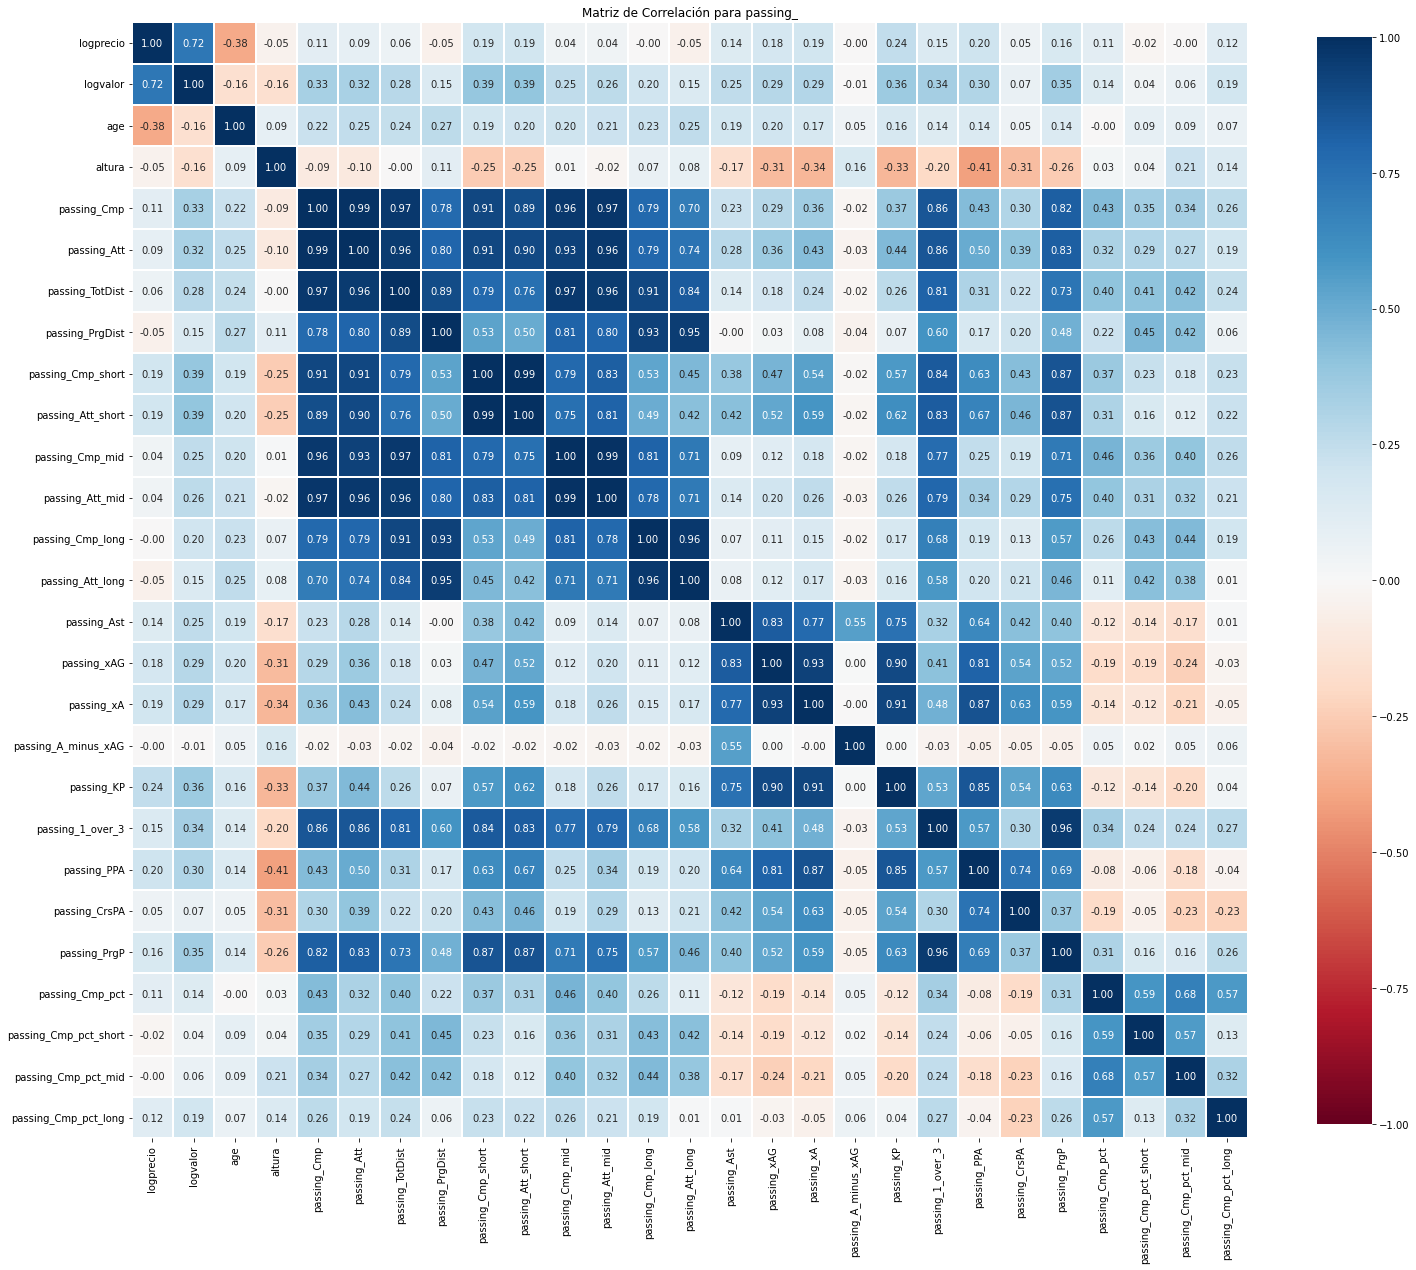

Index(['logprecio', 'logvalor', 'age', 'altura', 'passing_types_Live',
       'passing_types_Dead', 'passing_types_FK', 'passing_types_TB',
       'passing_types_Sw', 'passing_types_Crs', 'passing_types_TI',
       'passing_types_CK', 'passing_types_In', 'passing_types_Out',
       'passing_types_Str', 'passing_types_Off', 'passing_types_Blocks'],
      dtype='object')


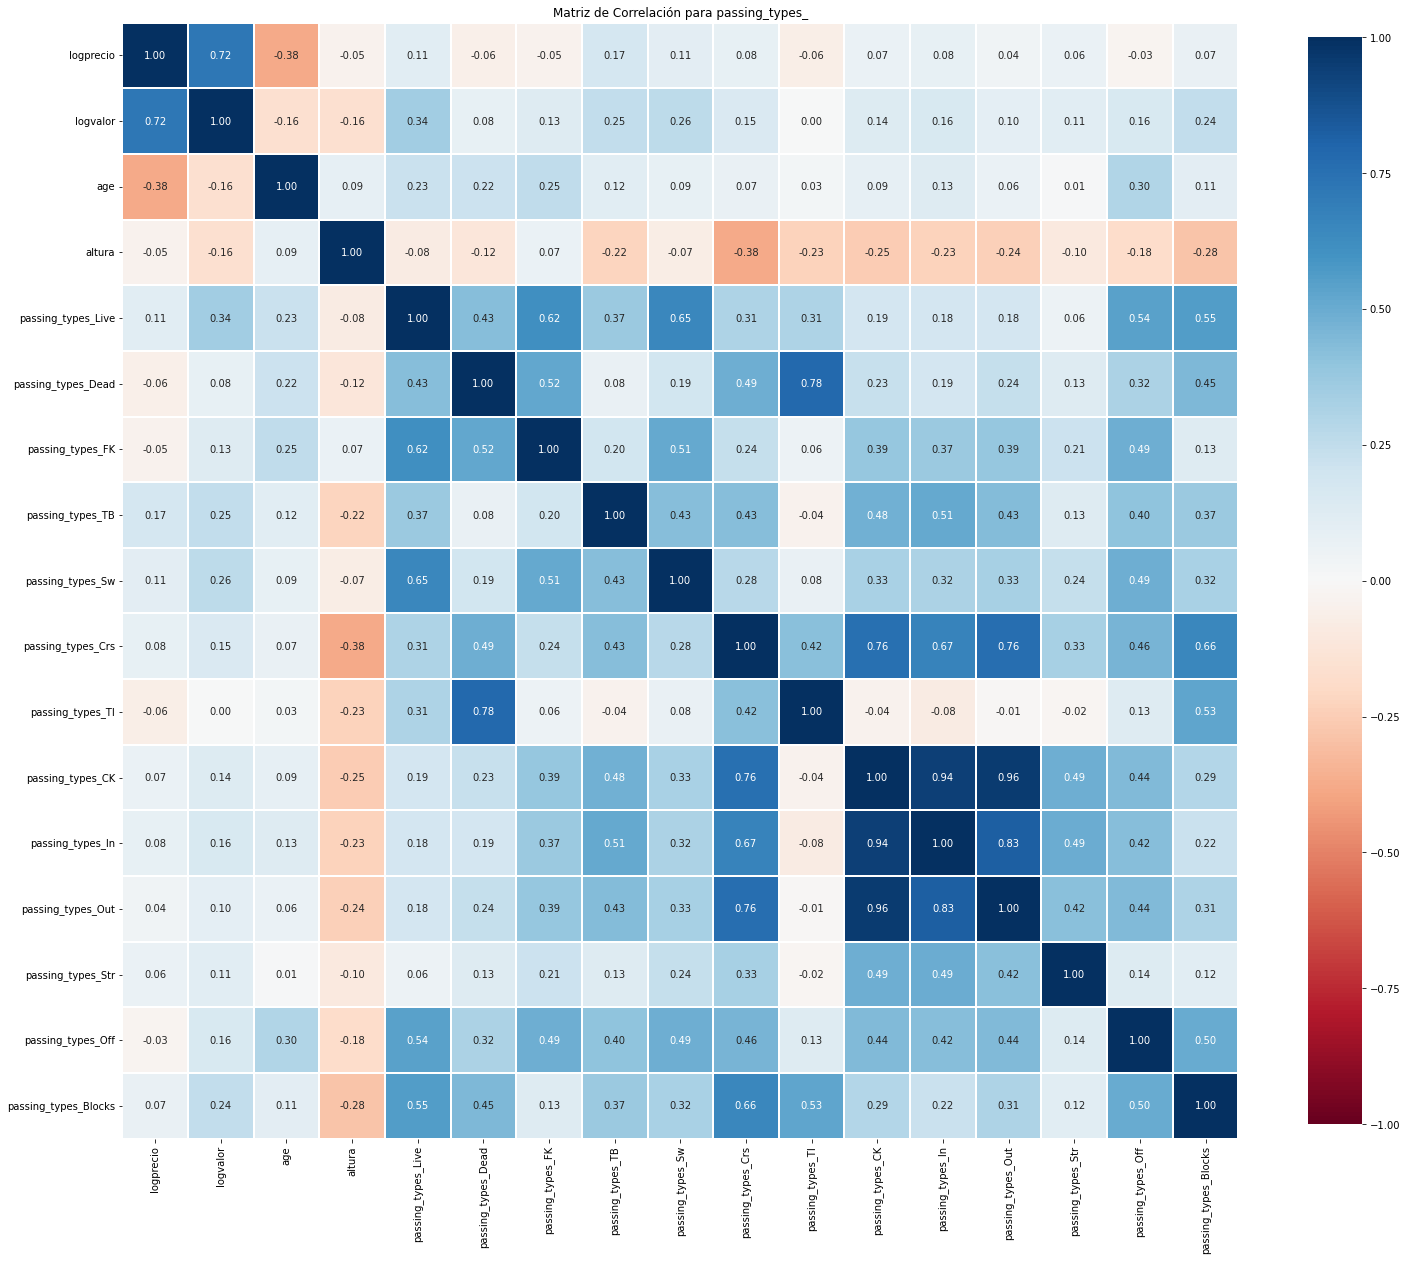

Index(['logprecio', 'logvalor', 'age', 'altura', 'gca_SCA', 'gca_sca_PassLive',
       'gca_sca_PassDead', 'gca_sca_TO', 'gca_sca_Sh', 'gca_sca_Fld',
       'gca_sca_Def', 'gca_GCA', 'gca_PassLive', 'gca_PassDead', 'gca_TO',
       'gca_Sh', 'gca_Fld', 'gca_Def'],
      dtype='object')


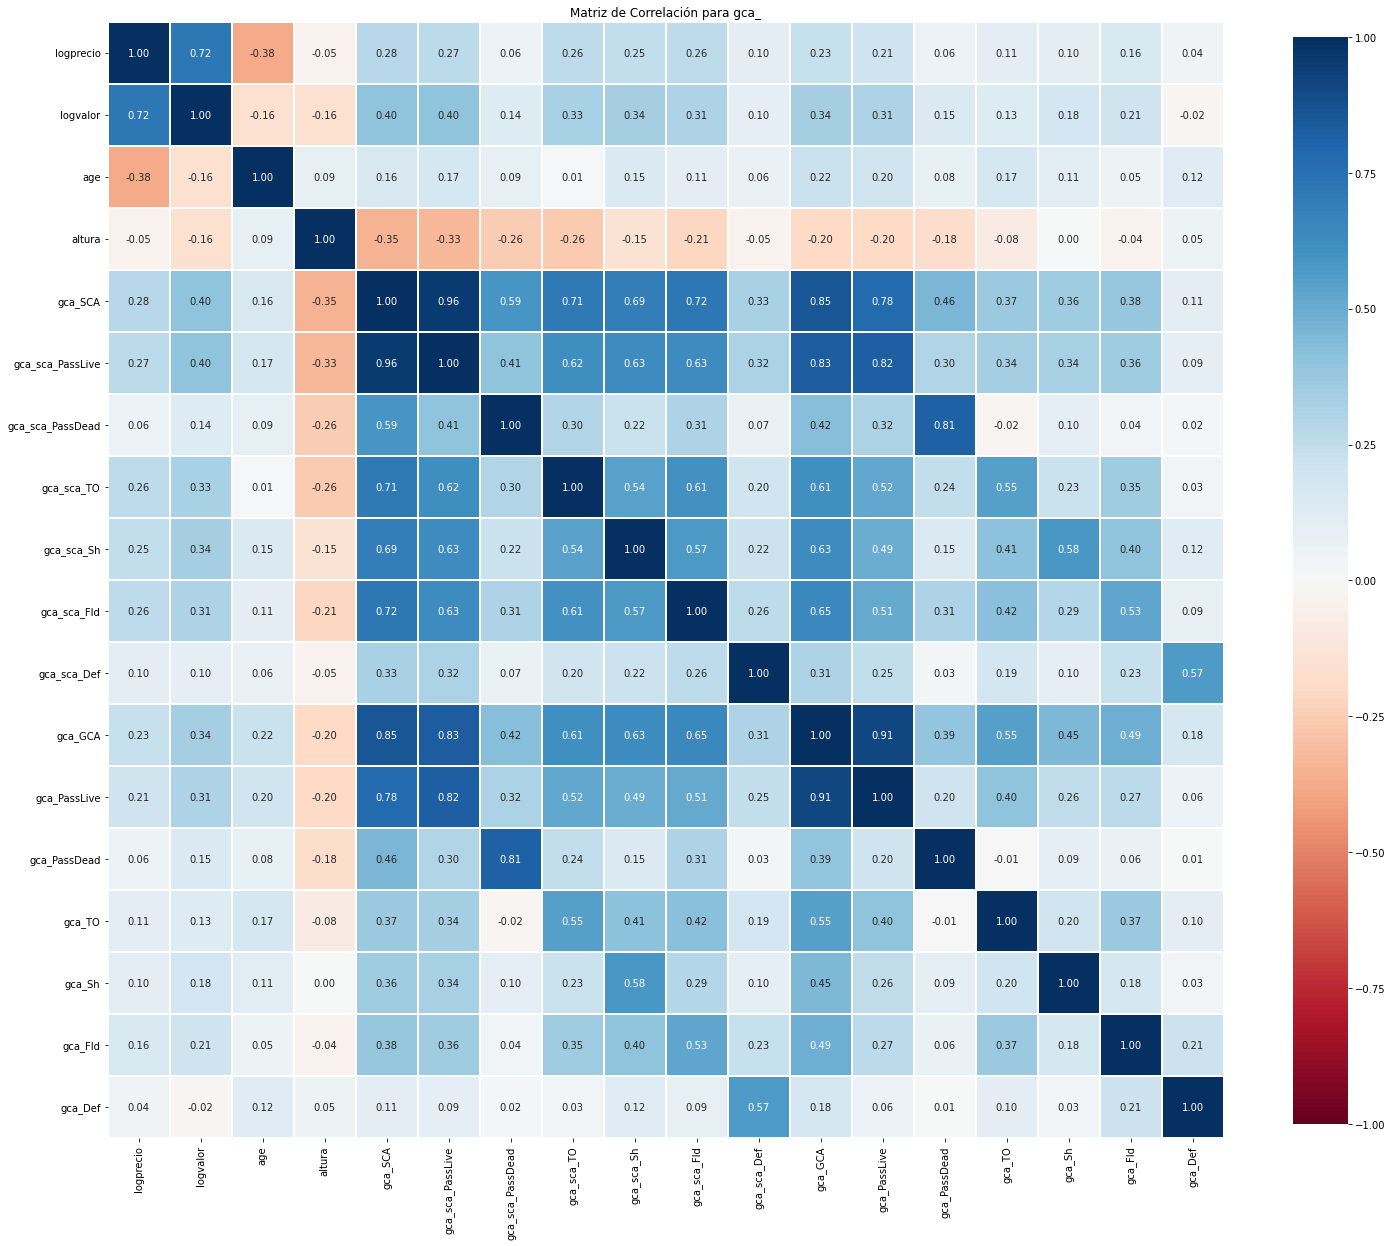

Index(['logprecio', 'logvalor', 'age', 'altura', 'defense_Tkl', 'defense_TklW',
       'defense_Def_3rd', 'defense_Mid_3rd', 'defense_Att_3rd',
       'defense_Tkl_OonO', 'defense_Att', 'defense_Lost', 'defense_Blocks',
       'defense_Sh', 'defense_Pass', 'defense_Int', 'defense_Tkl_plus_Int',
       'defense_Clr', 'defense_Err', 'defense_Tkl_pct'],
      dtype='object')


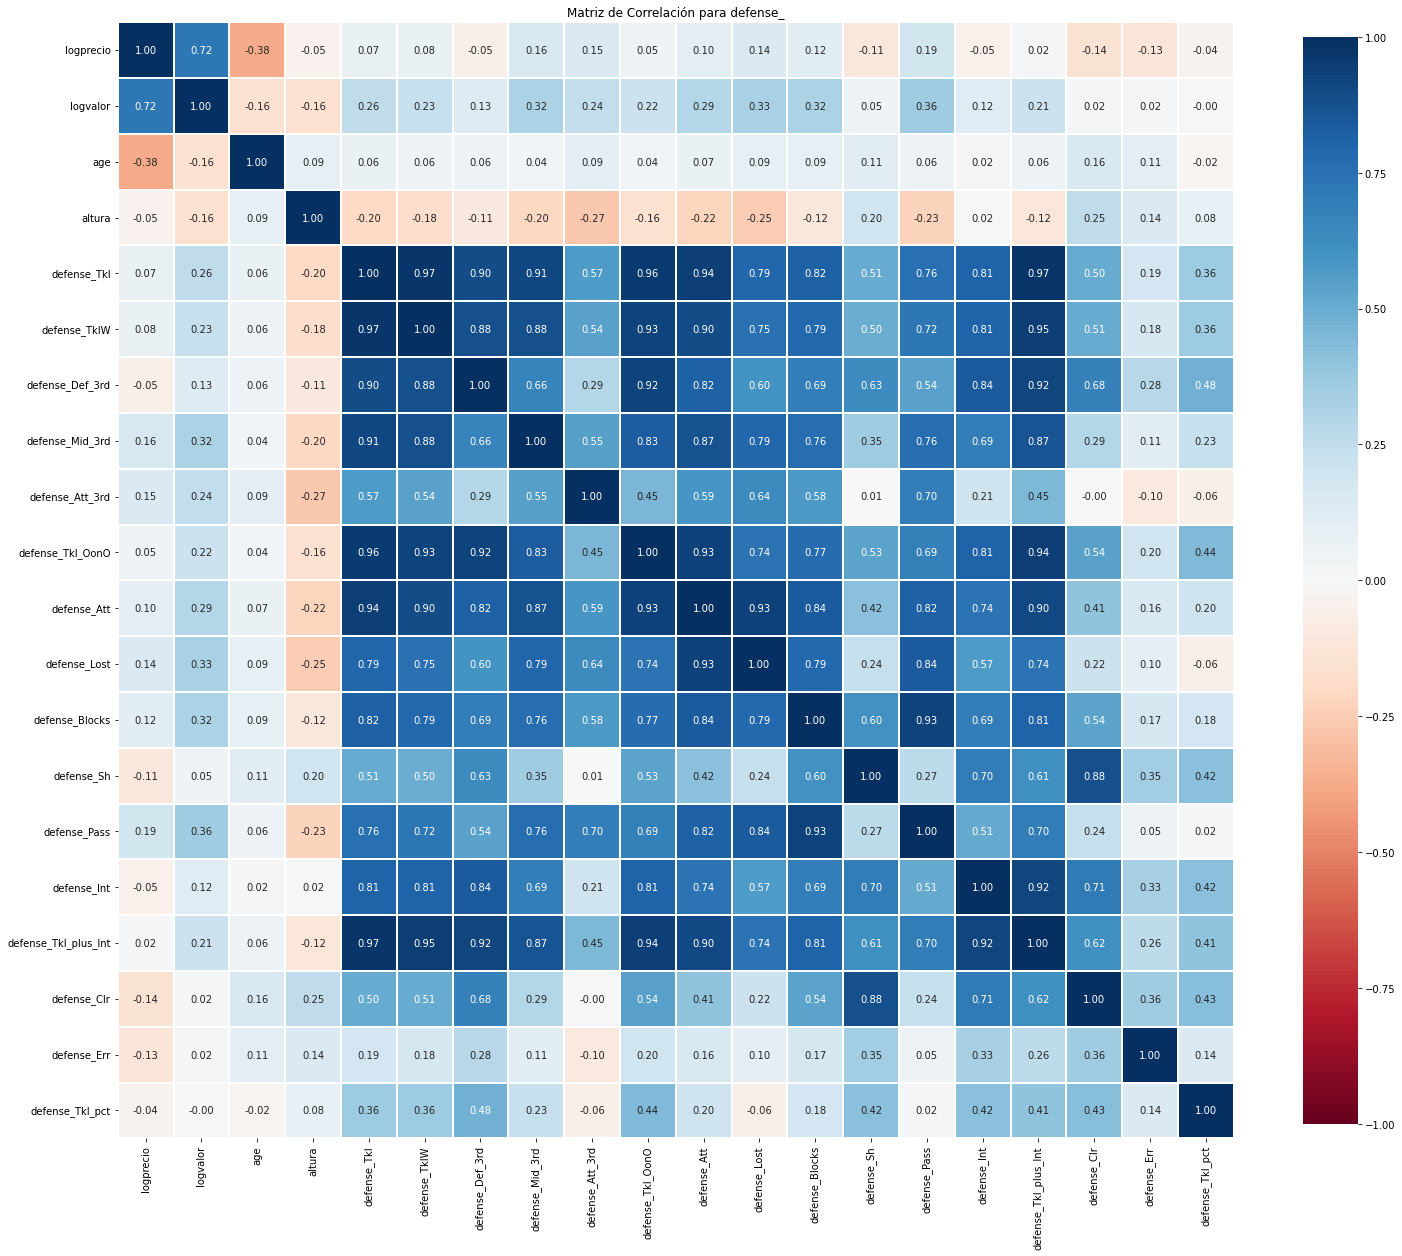

Index(['logprecio', 'logvalor', 'age', 'altura', 'possession_Touches',
       'possession_Def_Pen', 'possession_Def_3rd', 'possession_Mid_3rd',
       'possession_Att_3rd', 'possession_Att_Pen', 'possession_Live',
       'possession_Att', 'possession_Succ', 'possession_Tkld',
       'possession_Carries', 'possession_TotDist', 'possession_PrgDist',
       'possession_PrgC', 'possession_1_over_3', 'possession_CPA',
       'possession_Mis', 'possession_Dis', 'possession_Rec', 'possession_PrgR',
       'possession_Succ_pct', 'possession_Tkld_pct'],
      dtype='object')


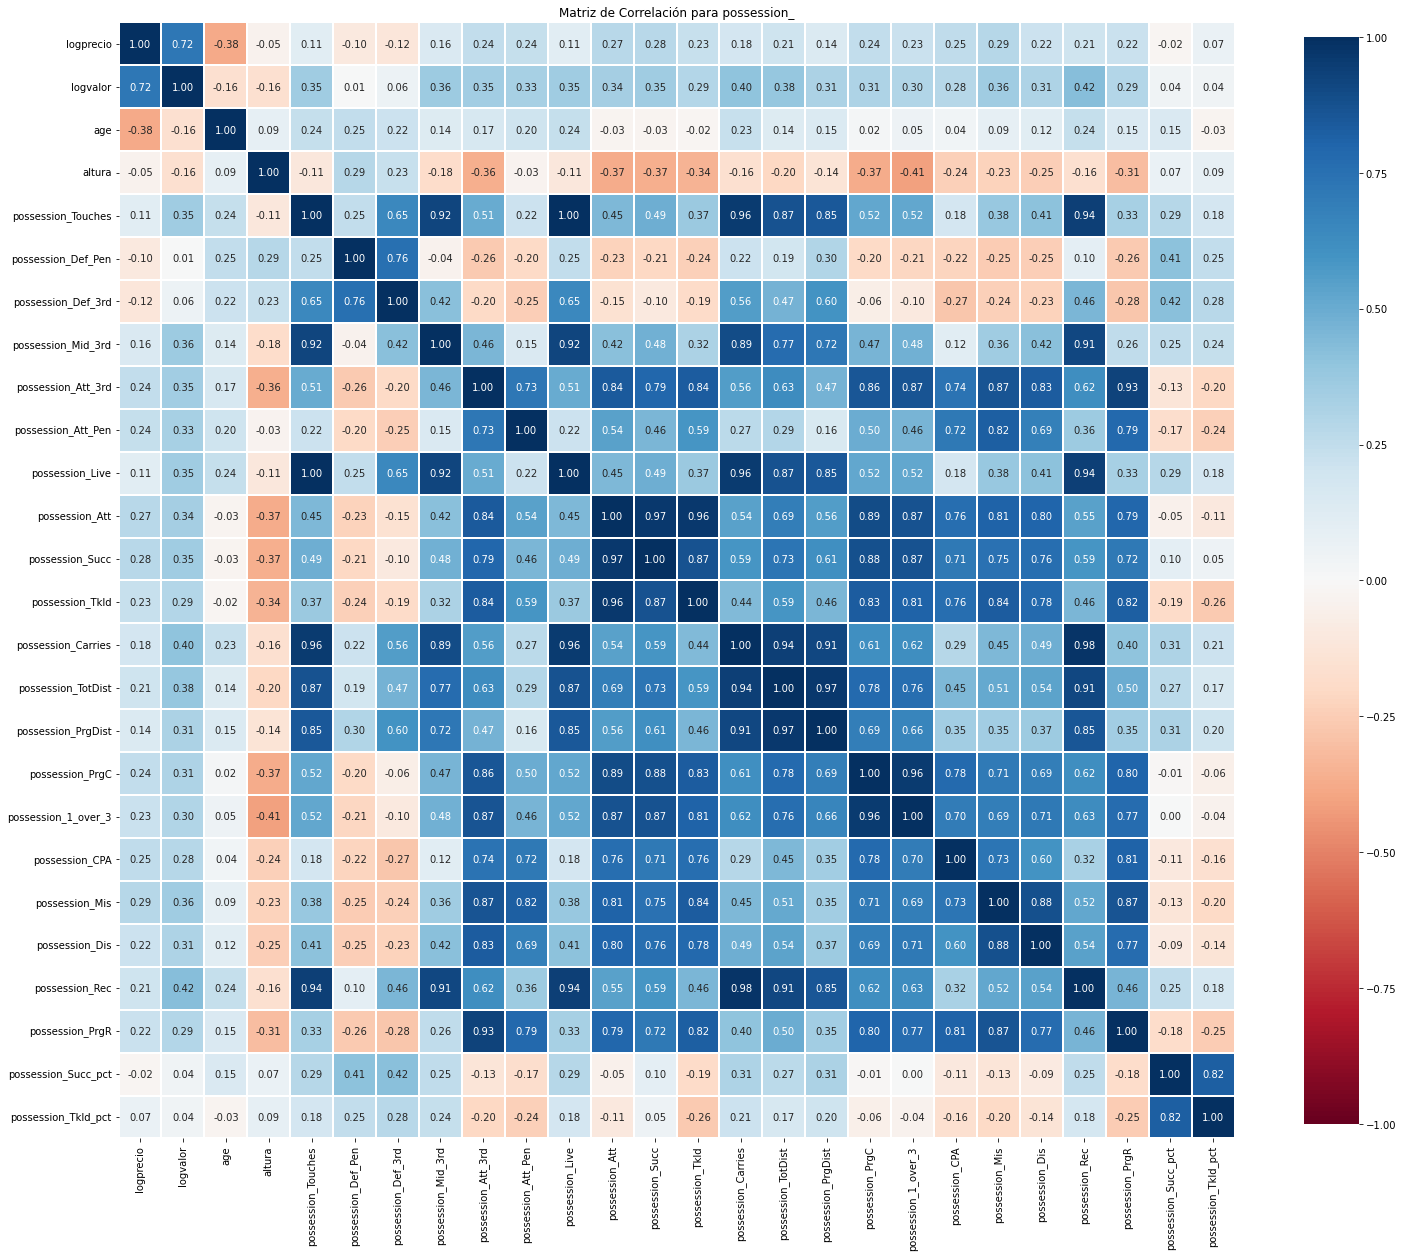

Index(['logprecio', 'logvalor', 'age', 'altura', 'playingtime_MP',
       'playingtime_Min', 'playingtime_Mn_over_MP', 'playingtime_Min_pct',
       'playingtime_90s', 'playingtime_Starts', 'playingtime_Mn_over_Start',
       'playingtime_Subs', 'playingtime_Mn_over_Sub', 'playingtime_unSub',
       'playingtime_PPM', 'playingtime_onG', 'playingtime_onGA',
       'playingtime_plus_over_minus_', 'playingtime_onxG', 'playingtime_onxGA',
       'playingtime_xG_plus_over_minus_'],
      dtype='object')


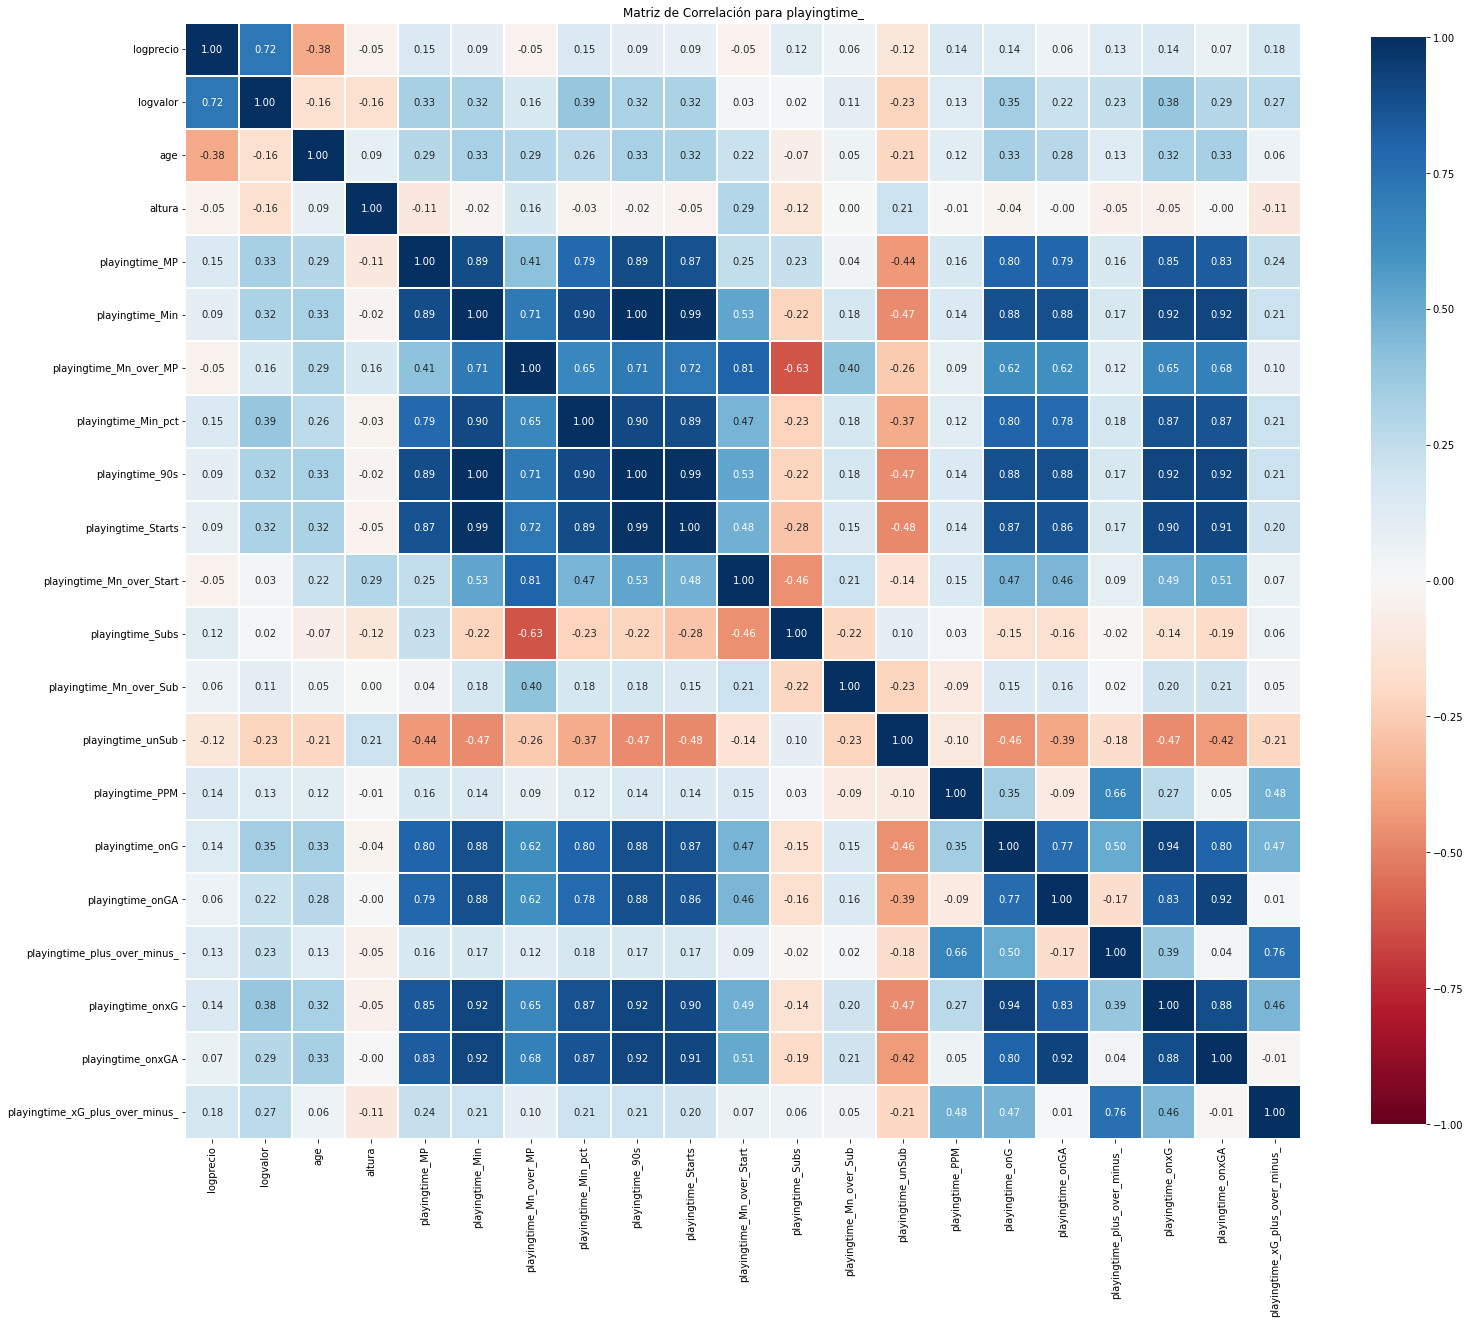

Index(['logprecio', 'logvalor', 'age', 'altura', 'misc_CrdY', 'misc_CrdR',
       'misc_2CrdY', 'misc_Fls', 'misc_Fld', 'misc_Off', 'misc_Crs',
       'misc_Int', 'misc_TklW', 'misc_PKwon', 'misc_PKcon', 'misc_OG',
       'misc_Recov', 'misc_Won', 'misc_Lost', 'misc_Won_pct'],
      dtype='object')


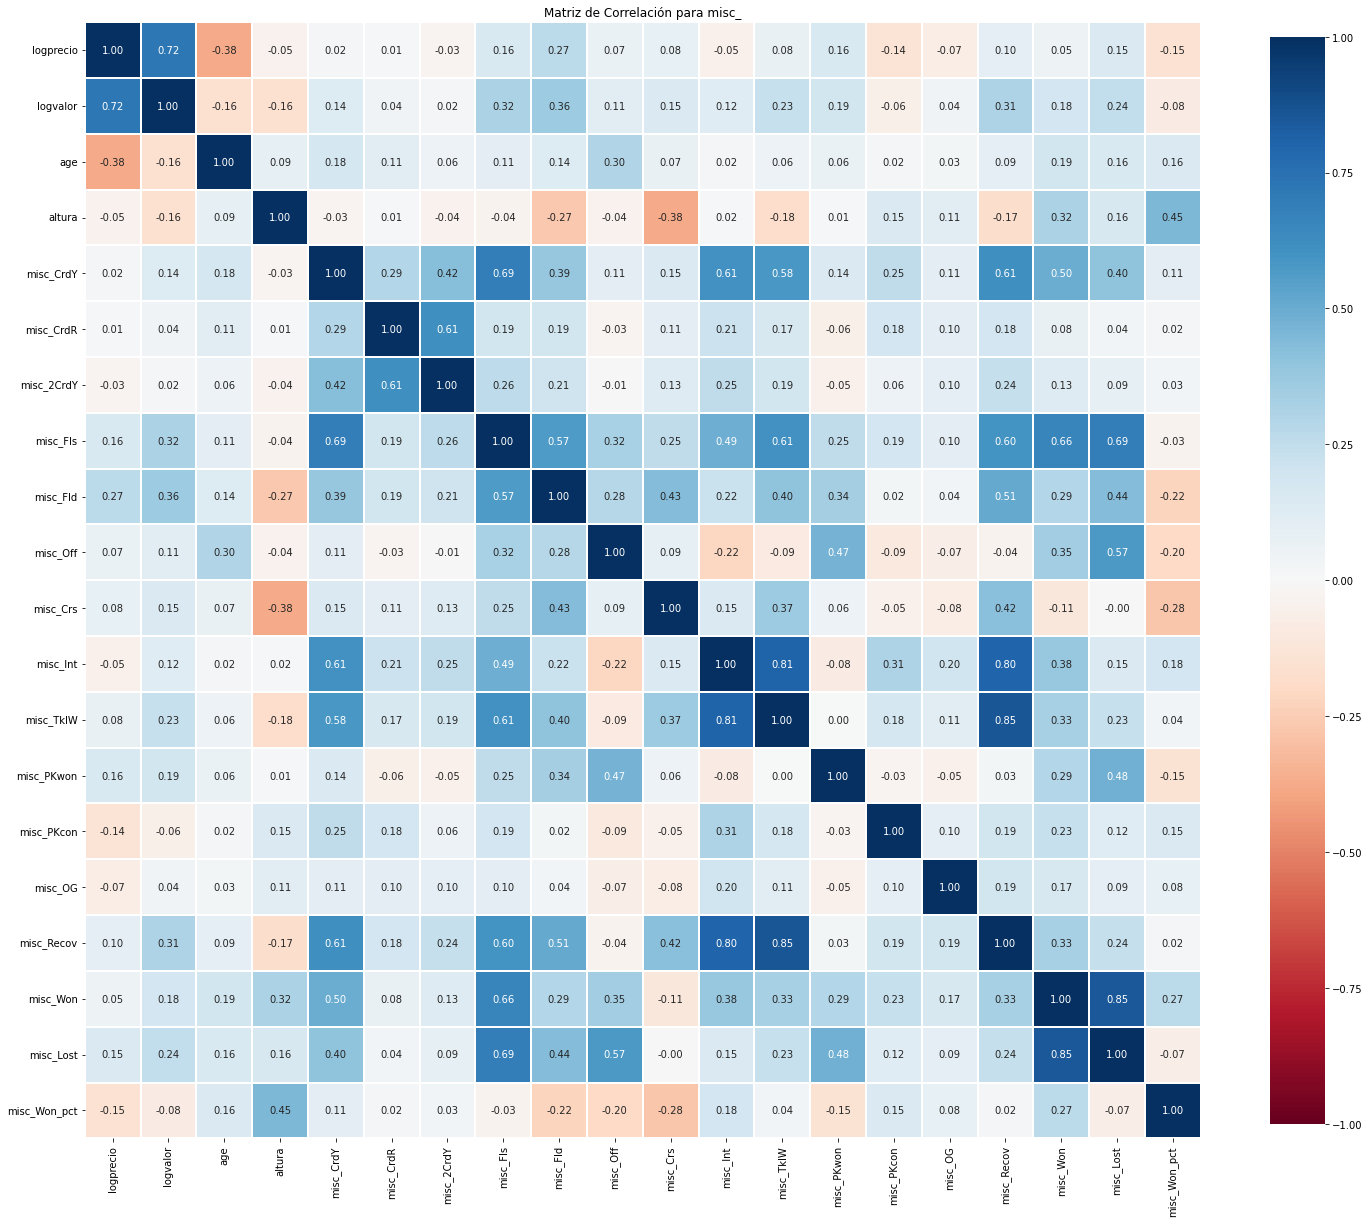

In [26]:

df_con_precio = df[(df['transfer_fee']>0) ] # & (df['posicion']=='Medio campo')

# Variables fijas
variables_fijas = ['logprecio', 'logvalor', 'age', 'altura']

# Prefijos de los grupos variables
prefijos = ['stats_', 'shooting_', 'passing_', 'passing_types_', 'gca_', 
            'defense_', 'possession_', 'playingtime_', 'misc_']

# Función para filtrar columnas por prefijo y generar la matriz de correlación
def generar_matriz_correlacion(df, variables_fijas, prefijo, 
                               variables_of_interest = ['transfer_fee', 'market_value'], threshold = 0.2):
    # Seleccionar las columnas que empiezan con el prefijo
    columnas_grupo = [col for col in df.columns if col.startswith(prefijo)]
    
    # Combinar las variables fijas con el grupo de columnas seleccionado
    columnas_a_usar = variables_fijas + columnas_grupo
    
    # Filtrar el DataFrame solo con las columnas seleccionadas
    df_grupo = df[columnas_a_usar]

    if prefijo == 'passing_':
        df_grupo = df_grupo.drop(df_grupo.filter(regex='^passing_types_').columns, axis=1)
    
    # Generar la matriz de correlación
    corr_matrix = df_grupo.corr()
    
    # Graficar la matriz de correlación
    print(corr_matrix.columns)
    plt.figure(figsize=(25, 25))
    sns.heatmap(corr_matrix, linewidths=0.1, vmax=1.0,vmin=-1.0, square=True, fmt=".2f", 
            cmap=colormap, linecolor='white', annot=True, cbar_kws={"shrink": .8})
    plt.title(f'Matriz de Correlación para {prefijo}')
    plt.show()

# Generar la matriz de correlación para cada grupo
for prefijo in prefijos:
    generar_matriz_correlacion(df_con_precio, variables_fijas, prefijo)

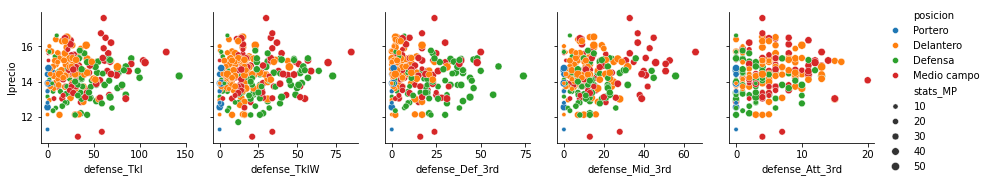

In [27]:
if not stats_by90:
    x_vars = ['defense_Tkl', 'defense_TklW', 'defense_Def_3rd', 'defense_Mid_3rd',
           'defense_Att_3rd']#['stats_MP', 'gca_SCA', 'gca_GCA', 'passing_Cmp.1']
    y_vars = ['lprecio', 'logprecio']
    selected_columns = y_vars + x_vars + ['posicion']
    df_selected = df[selected_columns]
    
    # Crear el grid de pairplots
    g = sns.PairGrid(df_selected, x_vars=x_vars, y_vars='lprecio', hue="posicion")
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot, size=df["stats_MP"])
    g.add_legend(title="", adjust_subtitles=True)

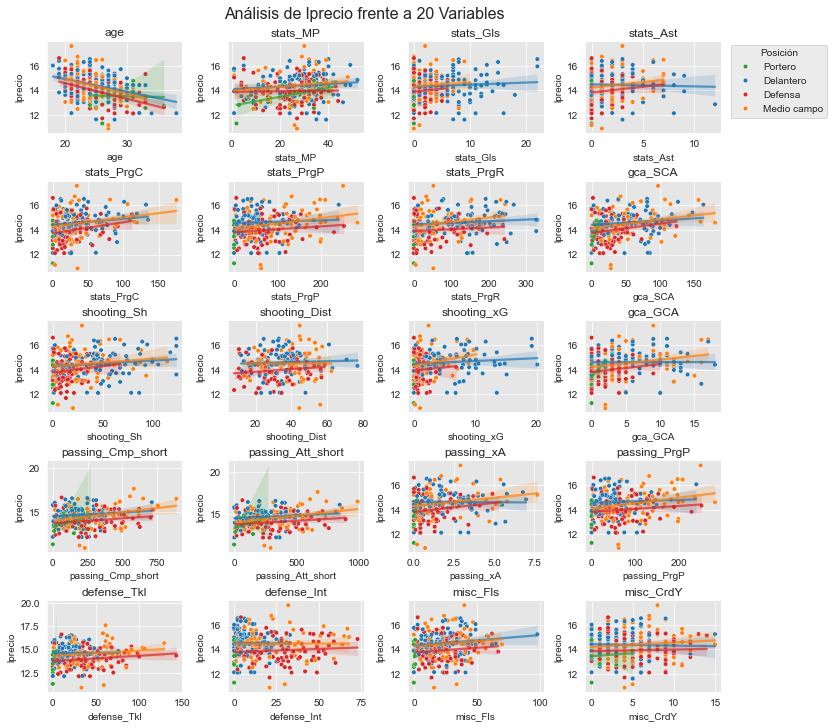

In [28]:
position_palette = ["#2ca02c", "#1f77b4", "#d62728", "#ff7f0e"]

if not stats_by90:
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    # Definir las variables para los ejes
    x_vars = ['age', 'stats_MP', 'stats_Gls', 'stats_Ast', 'stats_PrgC', 'stats_PrgP', 'stats_PrgR', 
              'gca_SCA', 'shooting_Sh', 'shooting_Dist', 'shooting_xG', 'gca_GCA', 'passing_Cmp_short', 
              'passing_Att_short', 'passing_xA', 'passing_PrgP', 'defense_Tkl', 'defense_Int', 
              'misc_Fls', 'misc_CrdY']
    y_var = 'lprecio'

    # Crear la figura
    fig, axes = plt.subplots(5, 4, figsize=(10, 10), constrained_layout=True)
    fig.suptitle(f'Análisis de {y_var} frente a 20 Variables', fontsize=16)
    axes = axes.flatten()

    # Generar gráficos para cada variable
    for i, x_var in enumerate(x_vars):
        # Scatter plot por posición
        sns.scatterplot(data=df, x=x_var, y=y_var, hue="posicion", 
                       ax=axes[i], s=20, palette=position_palette)
        
        # Líneas de regresión por posición
        for posicion, color in zip(df['posicion'].unique(), position_palette):
            df_pos = df[df['posicion'] == posicion]
            sns.regplot(data=df_pos, x=x_var, y=y_var, 
                       ax=axes[i], scatter=False, 
                       color=color, line_kws={'alpha':0.7})

        axes[i].set_title(x_var)
        axes[i].legend_.remove()
        sns.despine(ax=axes[i], top=True, right=True)

    # Remover ejes no usados
    for j in range(len(x_vars), len(axes)):
        fig.delaxes(axes[j])

    # Agregar leyenda global
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', title='Posición', 
              bbox_to_anchor=(1.15, 0.95))

    plt.show()


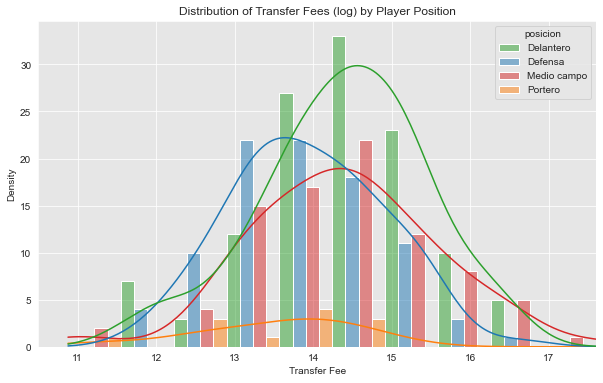

In [29]:
df_filtered = df[(df['transfer_fee'] > 0)]
plt.figure(figsize=(10, 6))
sns.histplot( #kdeplot
    x="lprecio",
    # y='market_value',
    data=df_filtered,
    hue="posicion",
    fill=True,
    palette=position_palette,
    linewidth=1,
    common_norm=False,
    kde=True, bins=10
    , multiple="dodge"
)
plt.xlim(10.5, df_filtered['lprecio'].max())
plt.xlabel("Transfer Fee")
plt.ylabel("Density")
plt.title("Distribution of Transfer Fees (log) by Player Position")
plt.show()

## Analisis Componentes principales

### Analisis Componentes principales generales excluyendo MP y goles

In [30]:
# Definir los prefijos de interés para agrupar las columnas
prefijos = ['stats', 'shooting', 'passing', 'passing_types', 'gca', 'defense', 'possession', 'playingtime', 'misc', 'keepers', 'keepersadv']

fbref_cols = [col for col in df.columns if any(col.startswith(f'{s}_') for s in prefijos)]

# Crear los nuevos DataFrames
df_fbref = df[fbref_cols]
df_transfer = df.drop(fbref_cols, axis=1)

In [31]:
fbref_cols_colineal = [
    'stats_90s','stats_G+A', 'stats_G-PK',
]

In [32]:
fbref_cols

['stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G_plus_A',
 'stats_G_minus_PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG_plus_xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_G_over_Sh',
 'shooting_G_over_SoT',
 'shooting_Dist',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_FK',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG_over_Sh',
 'shooting_G_minus_xG',
 'shooting_np_G_minus_xG',
 'passing_Cmp',
 'passing_Att',
 'passing_TotDist',
 'passing_PrgDist',
 'passing_Cmp_short',
 'passing_Att_short',
 'passing_Cmp_mid',
 'passing_Att_mid',
 'passing_Cmp_long',
 'passing_Att_long',
 'passing_Ast',
 'passing_xAG',
 'passing_xA',
 'passing_A_minus_xAG',
 'passing_KP',
 'passing_1_over_3',
 'passing_PPA',
 'passing_CrsPA',
 'passing_PrgP',
 'passing_types_Live',
 'passing_types_Dead',
 'passing_types_FK',
 'pa

### Analisis Componentes principales por tipo de estadistica

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
# df = pd.read_csv("path_to_dataset.csv")

# Definir los prefijos de interés para agrupar las columnas
prefijos = ['stats', 'shooting', 'passing', 'passing_types', 'gca', 'defense', 'possession', 'playingtime', 'misc', 'keepers', 'keepersadv']

# Dictionary to store PCA results for each group of columns
pca_results = {}

# Almacenar la varianza explicada acumulativa
explained_variance_ratios = {}

# Iterar sobre cada sufijo y aplicar PCA a los grupos de columnas
for prefijo in prefijos:
    # Filtrar las columnas que pertenecen al sufijo actual
    group_cols = [col for col in df.columns if col.startswith(prefijo)]
    # group_data = df[group_cols].dropna()  # Manejo de NaN
    group_data = df[group_cols].fillna(0)  # Manejo de NaN
    
    
    # Estandarizar los datos
    scaler = StandardScaler()
    group_data_scaled = scaler.fit_transform(group_data)
    
    # Realizar PCA y determinar el número de componentes que explican el 95% de la varianza
    pca = PCA()
    pca.fit(group_data_scaled)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Número mínimo de componentes para capturar el 95% de varianza
    n_components = np.argmax(cumulative_variance >= 0.8) + 1
    explained_variance_ratios[prefijo] = cumulative_variance[:n_components]
    
    # Aplicar PCA con el número adecuado de componentes
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(group_data_scaled)
    
    # Crear un DataFrame de los componentes principales y renombrar columnas
    component_names = [f"{prefijo}_PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(principal_components, columns=component_names, index=group_data.index)
    
    # Añadir los componentes principales al DataFrame original
    pca_results[prefijo] = pca_df

# Concatenar todos los resultados de PCA con el DataFrame original
df_pca = pd.concat([df_transfer] + list(pca_results.values()), axis=1)
df_full = pd.concat([df] + list(pca_results.values()), axis=1)

# Resultados de la varianza explicada por cada componente de cada grupo
print("Varianza explicada acumulada para cada grupo de componentes:")
for sufijo, variances in explained_variance_ratios.items():
    print(f"{sufijo}: {variances}")

Varianza explicada acumulada para cada grupo de componentes:
stats: [0.49825566 0.6619204  0.77454921 0.83014692]
shooting: [0.44099762 0.60696115 0.74112299 0.81195001]
passing: [0.53242176 0.6732035  0.74197414 0.80382642]
passing_types: [0.49954635 0.654037   0.74922482 0.81932503]
gca: [0.51058209 0.61904487 0.70654939 0.77096883 0.82615768]
defense: [0.68648483 0.8025481 ]
possession: [0.62172349 0.79689839 0.85720527]
playingtime: [0.50029362 0.63265724 0.72676286 0.79046157 0.84413715]
misc: [0.34252263 0.47405778 0.58179278 0.67057844 0.73239868 0.78289039
 0.82972741]
keepers: [0.59705689 0.71133368 0.77543113 0.82649146]
keepersadv: [0.63107503 0.76066078 0.81559871]


In [34]:
if GUARDAR:
    df_full = pd.concat([df] + list(pca_results.values()), axis=1)
    str_over90 = ''
    if stats_by90:
        str_over90 = '_overPT90'
    df_full.to_csv(f'df_full_with_PCA{str_over90}.csv',index=False)

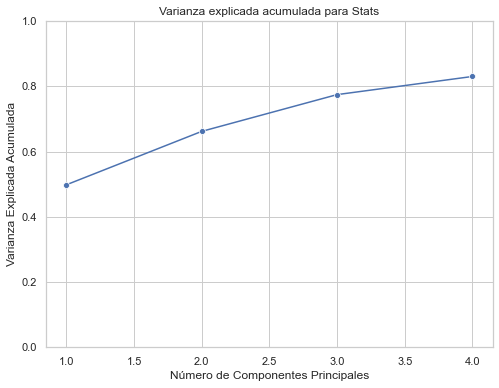

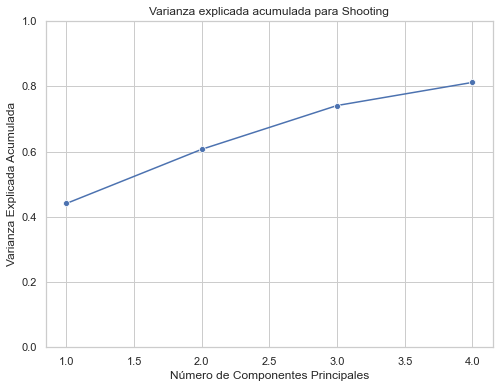

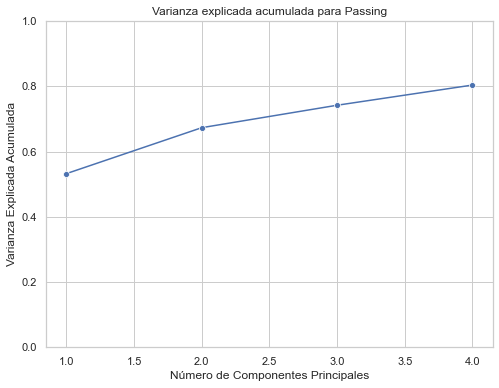

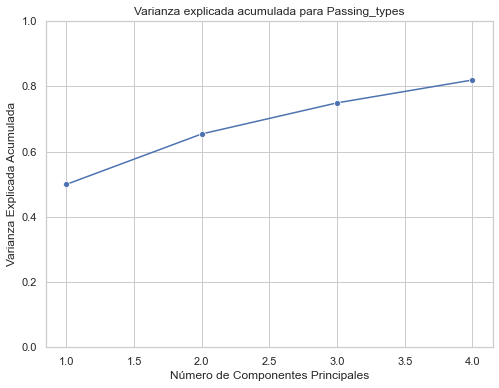

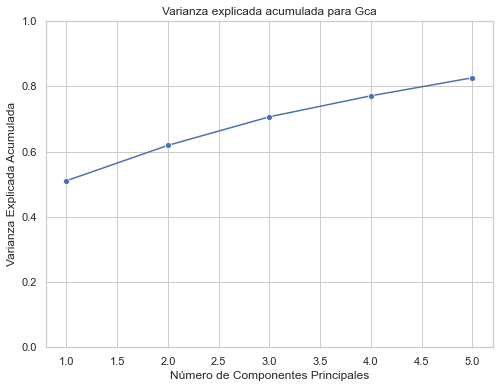

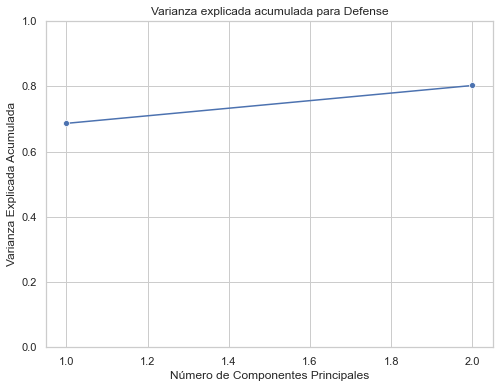

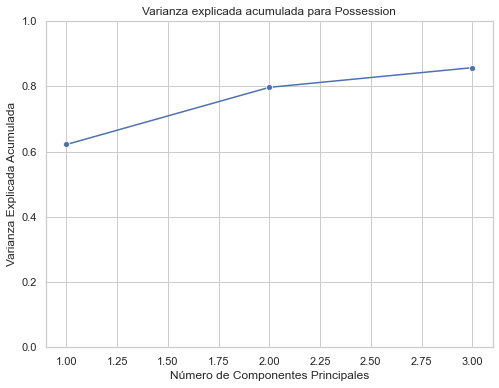

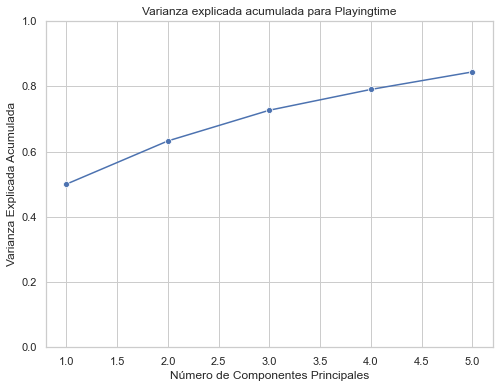

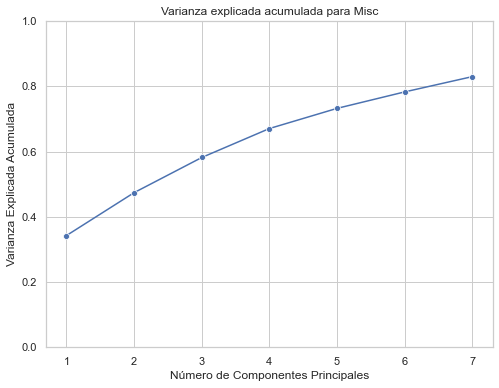

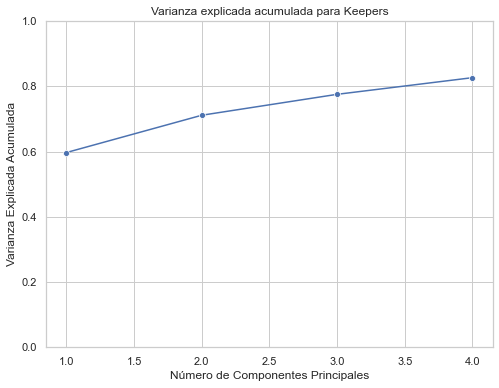

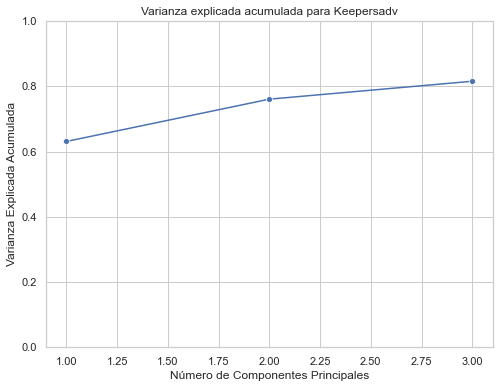

In [35]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Bucle para crear una figura para cada grupo
for group_name, explained_variance in explained_variance_ratios.items():
    # Crear un DataFrame para facilitar el uso de Seaborn
    df_pc = pd.DataFrame({
        "Component": range(1, len(explained_variance) + 1),
        "Explained Variance": explained_variance
    })
    
    # Configuración de la figura y el gráfico
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df_pc, x="Component", y="Explained Variance", marker="o")
    plt.title(f"Varianza explicada acumulada para {group_name.capitalize()}")
    plt.xlabel("Número de Componentes Principales")
    plt.ylabel("Varianza Explicada Acumulada")
    plt.ylim(0, 1)  # Limitar al 100%
    plt.grid(True)
    plt.show()

# Regresion Lineal

## Preparacion para aplicar modelos

In [36]:
# Lista de columnas a excluir
columnas_a_excluir = ['player_id','code_from', 'code_to', 'season_stats',                       
                      'Diferencia_MP', 'Diferencia_Gls', 'Diferencia_Ast',
                     'n_last_possible_sell', 'tiene_precio']

columnas_a_excluir =  [col for col in columnas_a_excluir if col in df.columns]

df = df.drop(columns= columnas_a_excluir)
df = df.loc[:, ~df.columns.str.endswith('.1')]

df.info(verbose=True, show_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 587 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    player_name                                840 non-null    object 
 1    age                                        840 non-null    int64  
 2    nationality                                840 non-null    object 
 3    comunitario                                840 non-null    int64  
 4    extranjero                                 840 non-null    int64  
 5    position                                   840 non-null    object 
 6    transfer_fee                               840 non-null    int64  
 7    season                                     840 non-null    int64  
 8    season_part                                840 non-null    object 
 9    club_from                                  840 non-null    object 
 10   club_to     

In [37]:
if GUARDAR:
    df.select_dtypes(include=['float64', 'int64']).to_csv('df_numerico_full.csv', index=False)

### Definicion sobre la transformación logarítmica

## Modelos para todos los precios

In [38]:
try:
    df = df.drop(columns= ['lprecio'])
except KeyError as e:
    print(e)

In [39]:

umbral_observaciones = 680

# Filtrar las columnas que tienen al menos 'umbral_observaciones' observaciones
columnas_suficientes = df.columns[df.notna().sum() >= umbral_observaciones]

# Crear un nuevo DataFrame solo con las columnas que cumplen el criterio
df_filtrado = df[columnas_suficientes]

df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.contains('stats_')]


# Filtrar solo las columnas numéricas
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])


# Eliminar las filas con valores NaN en el DataFrame filtrado
df_numerico = df_numerico.dropna()

# Verificar el resultado
print(df_numerico.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 2 to 836
Data columns (total 379 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    age                                        435 non-null    int64  
 1    comunitario                                435 non-null    int64  
 2    extranjero                                 435 non-null    int64  
 3    transfer_fee                               435 non-null    int64  
 4    season                                     435 non-null    int64  
 5    market_value                               435 non-null    float64
 6    altura                                     435 non-null    float64
 7    Internacional_pj_ant                       435 non-null    float64
 8    Local_pj_ant                               435 non-null    float64
 9    Internacional_Goals_ant                    435 non-null    float64
 10   Local_Goals_ant  

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Separar la variable objetivo y las variables predictoras
# df_numerico = df_numerico[df_numerico['transfer_fee']>0]
# df_numerico = df_numerico[df_numerico['lprecio'].notna()]
df_numerico


age  comunitario  extranjero  transfer_fee  season  market_value  altura  \
2     27            0           1             0    2022      650000.0   184.0   
3     35            1           0             0    2022      150000.0   184.0   
4     26            0           0             0    2022     2600000.0   166.0   
6     28            0           0             0    2022      200000.0   178.0   
8     35            0           0             0    2022      500000.0   175.0   
..   ...          ...         ...           ...     ...           ...     ...   
828   24            0           0       2300000    2024     2000000.0   179.0   
829   36            0           1        300000    2024      350000.0   176.0   
830   24            1           1             0    2024      175000.0   182.0   
834   28            0           0        548000    2024     1500000.0   176.0   
836   29            0           0             0    2024     3000000.0   188.0   

     Internacional_pj_ant  Local_pj_ant  Internacional_Goals_ant  ...  \
2                     2.0          18.0                      0.0  ...   
3                     0.0          16.0                      0.0  ...   
4                     0.0          24.0                      0.0  ...   
6                     0.0          10.0                      0.0  ...   
8                     2.0          21.0                      0.0  ...   
..                    ...           ...                      ...  ...   
828                   0.0          30.0                      0.0  ...   
829                   1.0          25.0                      0.0  ...   
830                   0.0          19.0                      0.0  ...   
834                  10.0          28.0                      1.0  ...   
836                   0.0          31.0                      0.0  ...   

     plantel_last  Defensa  Delantero  Medio campo  Portero  invierno  verano  \
2            40.0        1          0            0        0         0       1   
3            46.0        0          0            1        0         0       1   
4            51.0        0          1            0        0         0       1   
6            51.0        0          0            1        0         0       1   
8            63.0        0          1            0        0         0       1   
..            ...      ...        ...          ...      ...       ...     ...   
828          46.0        1          0            0        0         0       1   
829          46.0        1          0            0        0         0       1   
830          46.0        1          0            0        0         0       1   
834          50.0        1          0            0        0         0       1   
836          48.0        0          1            0        0         0       1   

     Diferencia_MP_full  Diferencia_Gls_full  Diferencia_Ast_full  
2                 -18.0                  0.0                  0.0  
3                  -3.0                 -1.0                 -1.0  
4                   8.0                  4.0                  2.0  
6                  -4.0                 -2.0                  1.0  
8                   1.0                 -1.0                  1.0  
..                  ...                  ...                  ...  
828                -1.0                  0.0                  0.0  
829                -4.0                  0.0                  0.0  
830                -2.0                  0.0                  0.0  
834               -14.0                 -1.0                  0.0  
836               -12.0                 -5.0                 -1.0  

[435 rows x 379 columns]

In [41]:
if GUARDAR:
    df_numerico.to_csv('df_numerico.csv', index=False)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

modelo_logaritmico = True
with_value = True


if modelo_logaritmico:
    vars_to_drop = ['transfer_fee', 'market_value', 'logprecio',# 'tiene_precio',
                   'valor_plantel_last', 'valor_plantel_to','valor_plantel_from']  
    if not with_value:
        vars_to_drop += ['logvalor']
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['logprecio']
else:
    
    vars_to_drop = ['transfer_fee', 'logvalor', 'logprecio',
                   'lvalor_plantel_last', 'lvalor_plantel_to','lvalor_plantel_from']
    if not with_value:
        vars_to_drop += ['market_value']
        
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['transfer_fee']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# chequeamos estratificacion

print(y_train.mean())
print(y_test.mean())



5.791007255922223
6.851836100191392


In [43]:
# Crear el modelo de Random Forest
modelo = RandomForestRegressor(random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
# Ver los parámetros del modelo
print(modelo.get_params())

Mean Squared Error (MSE): 12.966439970284034
R-squared (R2): 0.750197257124793
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [44]:
# Obtener la importancia de las características
feature_importances = modelo.feature_importances_

# Convertirlo a un DataFrame para una visualización más clara
importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias
importances_df[importances_df['Importance']>0]

Feature    Importance
357                          logvalor  4.363037e-01
71               rest_transfer_market  1.269242e-01
72                     tiene_contrato  6.560101e-02
0                                 age  3.165672e-02
113               playingtime_Min_pct  1.354148e-02
..                                ...           ...
47   Internacional_Penalty Kicks_ant2  6.264933e-09
260                       Lib_gca_Fld  3.361711e-09
209                Lib_shooting_PKatt  3.098053e-09
23    Internacional_Penalty Kicks_ant  1.670376e-09
238              Lib_passing_types_TB  3.924808e-10

[263 rows x 2 columns]

In [45]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Ajusta alpha según el grado de regularización deseado
model.fit(X_train, y_train)


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+03, tolerance: 1.954e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=912)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_


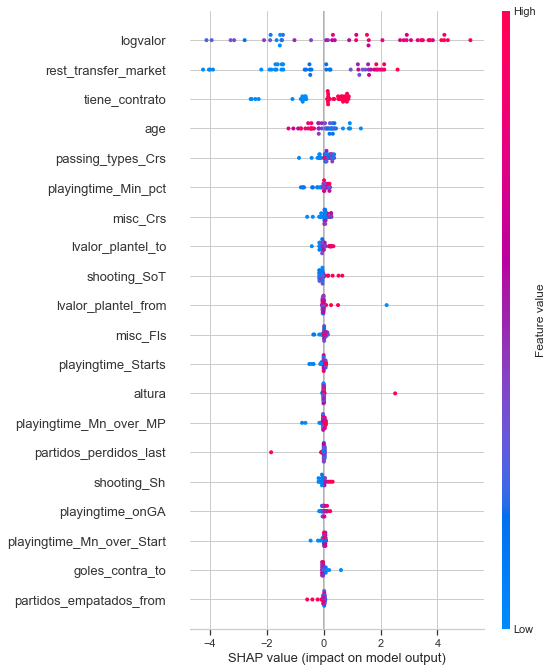

In [47]:
import shap

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test)  # Visualizar importancia de variables


In [48]:
# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Convertirlo a un DataFrame para una visualización más clara
importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias
importances_df[importances_df['Importance']>0].head(10)

Feature  Importance
357              logvalor    0.414430
71   rest_transfer_market    0.156488
72         tiene_contrato    0.054677
0                     age    0.032862
113   playingtime_Min_pct    0.014530
107     passing_types_Crs    0.014481
130              misc_Crs    0.012638
358   lvalor_plantel_from    0.010332
359     lvalor_plantel_to    0.009864
4                  altura    0.009789

In [49]:
print("X_train shape:", X_train.shape) 

X_train shape: (391, 373)


In [50]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

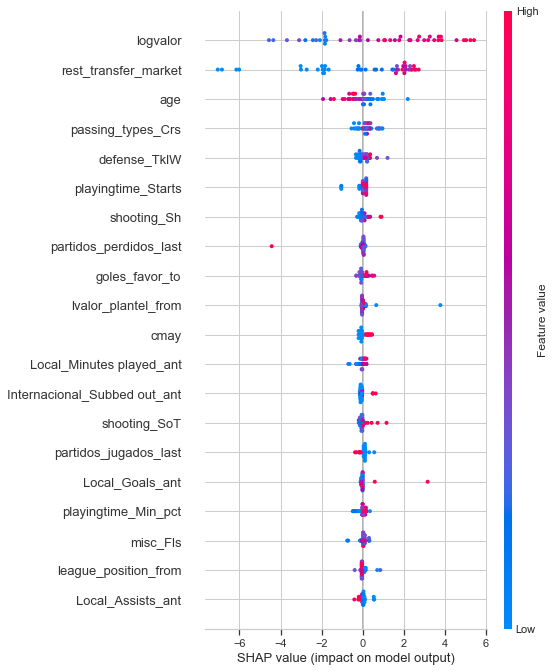

In [51]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)  # Visualizar importancia de variables


In [52]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [53]:
lm = LinearRegression() # llamo al modelo
lm.fit(X, y) # lo ajusto

LinearRegression()

In [54]:
beta_0 = lm.intercept_ # coeficientes del modelo 
beta_1 = lm.coef_

In [55]:
beta_0

np.float64(666.3140672172802)

In [56]:
beta_1



array([-8.29837905e-02, -3.31442217e-01, -1.59244797e+00, -6.55703409e-02,
       -6.66081040e-02,  2.47067977e+00,  9.90220406e-01,  7.39283536e-01,
        2.67019087e-01,  8.92292641e-01,  2.00159250e+00, -1.10436897e+00,
        2.78874268e+00, -1.26249712e+00, -1.87181992e-01, -3.49925829e-01,
        2.46944479e-01,  8.21558206e-01,  1.61520270e-02,  1.27395590e-01,
       -6.16886647e-01, -4.55289074e+00, -2.85243163e-01, -2.30370870e+00,
       -3.83930623e-01, -1.40145339e-02, -1.59358241e-03,  2.92186830e-11,
       -9.81692505e-12, -1.00848826e+00,  1.43385175e-02,  2.72447115e-01,
       -2.29649853e-01, -6.78234374e-02, -2.53921293e-01,  1.53192666e+01,
        2.64378222e-01,  8.40415999e-01, -2.39382484e-02,  5.22676962e-01,
        2.57434959e-02,  4.52777706e-01,  1.17057008e-01,  2.30396652e+00,
        4.51203634e-01,  2.37989076e+00,  1.24348958e-01, -4.07525274e-01,
        6.27090296e-01,  7.12427803e-03, -1.48494777e-04,  9.54381539e-13,
       -5.72331071e-12,  

## Modelos para precio positivo

In [57]:
# Definir el umbral mínimo de observaciones requerido

# # Lista de columnas a excluir
# columnas_a_excluir = ['Diferencia_MP', 'Diferencia_Gls', 'Diferencia_Ast',
#                       'player_id','code_from', 'code_to']

# # Filtrar las columnas que no están en la lista de exclusión
# df = df.drop(columns=columnas_a_excluir)

umbral_observaciones = 250

df_con_precio = df[(df['transfer_fee']>0) ]

# Filtrar las columnas que tienen al menos 'umbral_observaciones' observaciones
columnas_suficientes = df_con_precio.columns[df_con_precio.notna().sum() >= umbral_observaciones]

# Crear un nuevo DataFrame solo con las columnas que cumplen el criterio
df_filtrado = df_con_precio[columnas_suficientes]

df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.contains('_pct')]
df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.endswith('_ant2')]
df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.endswith('_ant')]
df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.contains('stats_')]

# Filtrar solo las columnas numéricas
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])


# Eliminar las filas con valores NaN en el DataFrame filtrado
df_numerico = df_numerico.dropna()

# Verificar el resultado
print(df_numerico.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 18 to 834
Data columns (total 323 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    age                                        196 non-null    int64  
 1    comunitario                                196 non-null    int64  
 2    extranjero                                 196 non-null    int64  
 3    transfer_fee                               196 non-null    int64  
 4    season                                     196 non-null    int64  
 5    market_value                               196 non-null    float64
 6    altura                                     196 non-null    float64
 7    cedido_last                                196 non-null    float64
 8    varg                                       196 non-null    int64  
 9    carg                                       196 non-null    int64  
 10   vmay            

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


modelo_logaritmico = True
with_value = True


if modelo_logaritmico:
    vars_to_drop = ['transfer_fee', 'market_value', 'logprecio', # 'tiene_precio',
                   'valor_plantel_last', 'valor_plantel_to','valor_plantel_from']  
    if not with_value:
        vars_to_drop += ['logvalor']
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['logprecio']
else:
    
    vars_to_drop = ['transfer_fee', 'logvalor', 'logprecio',
                   'lvalor_plantel_last', 'lvalor_plantel_to','lvalor_plantel_from']
    if not with_value:
        vars_to_drop += ['market_value']
        
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['transfer_fee']
    
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=91218)

# chequeamos estratificacion

print(y_train.mean())
print(y_test.mean())



14.365107780345555
14.379766873932978


In [59]:
# Crear el modelo de Random Forest
modelo = RandomForestRegressor(random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
# Ver los parámetros del modelo
print(modelo.get_params())

Mean Squared Error (MSE): 0.6256722599198338
R-squared (R2): 0.5293139752058981
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [60]:
# Obtener la importancia de las características
feature_importances = modelo.feature_importances_

# Convertirlo a un DataFrame para una visualización más clara
importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias
importances_df[importances_df['Importance']>0]

Feature    Importance
301               logvalor  4.873941e-01
303      lvalor_plantel_to  1.672469e-01
0                      age  2.608291e-02
23    rest_transfer_market  1.669064e-02
68        playingtime_Subs  1.158170e-02
..                     ...           ...
215         Lib_defense_Sh  5.073550e-07
203             Lib_gca_Sh  4.250240e-07
204            Lib_gca_Fld  3.472509e-07
20                    cmed  2.271656e-07
189  Lib_passing_types_Str  6.385679e-09

[217 rows x 2 columns]

In [61]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Ajusta alpha según el grado de regularización deseado
model.fit(X_train, y_train)


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+01, tolerance: 1.993e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=912)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_



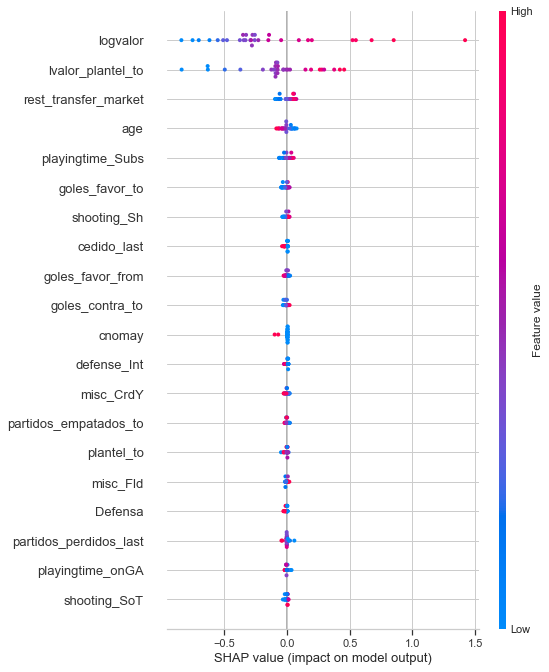

In [63]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)  # Visualizar importancia de variables


In [64]:
# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Convertirlo a un DataFrame para una visualización más clara
importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias
importances_df[importances_df['Importance']>0].head(10)

Feature  Importance
301              logvalor    0.505923
303     lvalor_plantel_to    0.172621
23   rest_transfer_market    0.019953
0                     age    0.018588
68       playingtime_Subs    0.010440
11                 cnomay    0.008924
38       goles_favor_from    0.008891
47         goles_favor_to    0.008234
48        goles_contra_to    0.007251
54            shooting_Sh    0.007017

In [65]:
print("X_train shape:", X_train.shape) 

X_train shape: (166, 317)


In [66]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

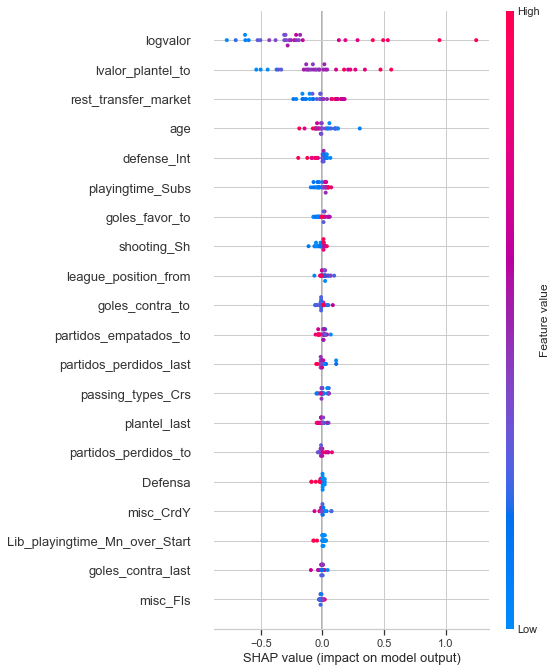

In [67]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)  # Visualizar importancia de variables


In [68]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [69]:
lm = LinearRegression() # llamo al modelo
lm.fit(X, y) # lo ajusto

LinearRegression()

In [70]:
beta_0 = lm.intercept_ # coeficientes del modelo 
beta_1 = lm.coef_

In [71]:
beta_0

np.float64(5123.753310927107)

In [72]:
beta_1



array([-1.09507299e-01, -1.19511862e-01, -1.02254072e-01, -5.07437838e-01,
        1.36344658e-02,  3.69091561e-02,  1.37789476e-01,  1.63140736e-01,
       -8.72562894e-02, -1.14066893e-01, -5.05331862e-02, -4.90738430e-02,
        6.63051425e-02, -5.73554334e-02, -2.04094618e-01, -1.05785302e-01,
       -3.29841352e-01, -8.56424099e-01,  7.71033839e-01,  3.44675006e-01,
       -1.42519195e-01,  1.29992395e-01,  1.26300033e+00,  1.15806968e-01,
        1.05325471e-13, -5.07437838e-01,  1.08956656e-02,  1.18308020e-03,
        1.67215158e-03, -1.55516621e-02,  2.64346225e-02, -1.54907277e-02,
        4.76552632e-02, -3.04923840e-02, -5.07437838e-01, -4.63599906e-02,
       -1.59436375e-02,  3.89249063e-02,  1.03985926e-02, -3.68183939e-02,
        6.84087083e-03, -3.64662500e-02,  6.85502855e-02, -5.07437838e-01,
       -1.74152400e-02,  1.76613164e-01, -1.70056770e-01, -3.17169532e-03,
        3.98576487e-03, -3.43768111e-01, -2.99091120e-02,  2.03620453e-01,
       -5.07437838e-01, -

# Modelos con Componentes principales

In [73]:

# Lista de columnas a excluir
columnas_a_excluir = ['Diferencia_MP', 'Diferencia_Gls', 'Diferencia_Ast', 
                      'n_last_possible_sell']

columnas_a_excluir =  [col for col in columnas_a_excluir if col in df_pca.columns]
df_pca = df_pca.drop(columns= columnas_a_excluir)

try:
    df_pca = df_pca.drop(columns= ['lprecio'])
except KeyError as e:
    print(e)

umbral_observaciones = 300

# Filtrar las columnas que tienen al menos 'umbral_observaciones' observaciones
columnas_suficientes = df_pca.columns[df_pca.notna().sum() >= umbral_observaciones]

# Crear un nuevo DataFrame solo con las columnas que cumplen el criterio
df_filtrado = df_pca[columnas_suficientes]


# Filtrar solo las columnas numéricas
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])


# Eliminar las filas con valores NaN en el DataFrame filtrado
df_numerico = df_numerico.dropna()

# Verificar el resultado
print(df_numerico.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 1 to 838
Data columns (total 354 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    age                                   233 non-null    int64  
 1    comunitario                           233 non-null    int64  
 2    extranjero                            233 non-null    int64  
 3    transfer_fee                          233 non-null    int64  
 4    season                                233 non-null    int64  
 5    market_value                          233 non-null    float64
 6    altura                                233 non-null    float64
 7    Internacional_pj_ant                  233 non-null    float64
 8    Local_pj_ant                          233 non-null    float64
 9    Internacional_Goals_ant               233 non-null    float64
 10   Local_Goals_ant                       233 non-null    float64
 11   Internaci

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Separar la variable objetivo y las variables predictoras
df_numerico = df_numerico[df_numerico['transfer_fee']>0]


modelo_logaritmico = True
with_value = True


if modelo_logaritmico:
    vars_to_drop = ['transfer_fee', 'market_value', 'logprecio',
                   'valor_plantel_last', 'valor_plantel_to','valor_plantel_from']  
    if not with_value:
        vars_to_drop += ['logvalor']
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['logprecio']
else:
    
    vars_to_drop = ['transfer_fee', 'logvalor', 'logprecio',
                   'lvalor_plantel_last', 'lvalor_plantel_to','lvalor_plantel_from']
    if not with_value:
        vars_to_drop += ['market_value']
        
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['transfer_fee']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=91218)

# chequeamos estratificacion

print(y_train.mean())
print(y_test.mean())



14.495296323723599
14.111072990011976


In [75]:
# Crear el modelo de Random Forest
modelo = RandomForestRegressor(random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
# Ver los parámetros del modelo
print(modelo.get_params())

Mean Squared Error (MSE): 0.36701958352075215
R-squared (R2): 0.36086574394738824
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [76]:
# Obtener la importancia de las características
feature_importances = modelo.feature_importances_

# Convertirlo a un DataFrame para una visualización más clara
importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias
importances_df[importances_df['Importance']>0]

Feature    Importance
286                         logvalor  4.515798e-01
288                lvalor_plantel_to  2.118582e-01
71              rest_transfer_market  2.831366e-02
330                  playingtime_PC2  1.278320e-02
290                       plantel_to  9.899088e-03
..                               ...           ...
134           Lib_shooting_G_over_Sh  1.510392e-08
66                             crgde  6.604014e-09
23   Internacional_Penalty Kicks_ant  6.295460e-09
123                   Lib_stats_CrdR  1.695503e-09
189                      Lib_gca_Fld  1.923038e-17

[285 rows x 2 columns]

In [77]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Ajusta alpha según el grado de regularización deseado
model.fit(X_train, y_train)


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+01, tolerance: 1.216e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [78]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=912)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_



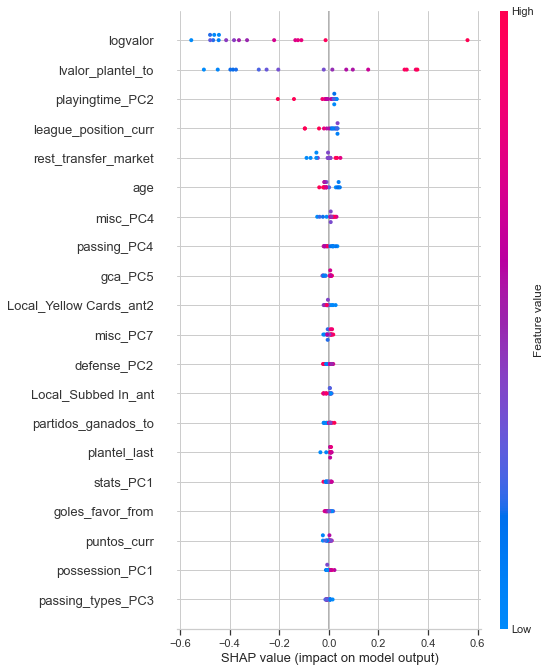

In [79]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)  # Visualizar importancia de variables


In [80]:
# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Convertirlo a un DataFrame para una visualización más clara
importances_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias
importances_df[importances_df['Importance']>0].head(10)

Feature  Importance
286              logvalor    0.432102
288     lvalor_plantel_to    0.226188
71   rest_transfer_market    0.020558
83   league_position_curr    0.019325
330       playingtime_PC2    0.017729
340              misc_PC7    0.011625
325           defense_PC2    0.010132
0                     age    0.008280
12    Local_Own goals_ant    0.007586
337              misc_PC4    0.007455

In [81]:
print("X_train shape:", X_train.shape) 

X_train shape: (91, 348)


In [82]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

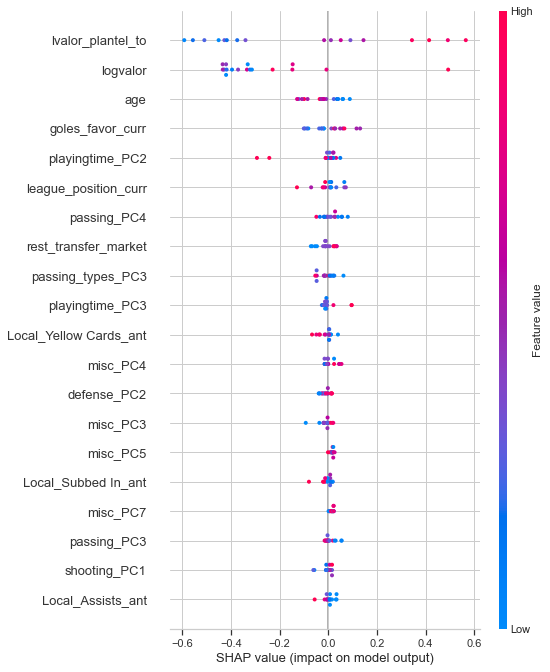

In [83]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)  # Visualizar importancia de variables


In [84]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [85]:
lm = LinearRegression() # llamo al modelo
lm.fit(X, y) # lo ajusto

LinearRegression()

In [86]:
beta_0 = lm.intercept_ # coeficientes del modelo 
beta_1 = lm.coef_

In [87]:
beta_0

np.float64(238.01802062878636)

In [88]:
beta_1



array([-3.98472834e-02,  2.99509151e-02, -3.40798058e-02, -1.98339377e-02,
        1.04736057e-02,  8.08412169e-02, -1.86521638e-02,  8.92885498e-03,
       -6.31843861e-02, -3.99914858e-02,  7.83472235e-02, -2.59495628e-04,
        2.81227402e-02,  6.04763690e-02, -3.15615449e-02, -1.37687570e-02,
       -2.67304439e-02, -8.85037902e-02,  3.75996297e-02,  4.16934256e-03,
       -2.91274490e-02, -3.93994145e-02,  6.24993713e-02,  1.52366590e-03,
        7.81387757e-02, -7.81936096e-04, -1.15025723e-04, -2.15105711e-16,
       -7.84095011e-16, -7.38843868e-02, -8.94465043e-02,  5.77692171e-02,
        9.74407038e-02, -5.23679356e-02, -3.42566575e-02,  7.87969910e-02,
        8.41729962e-03, -1.28316955e-01,  8.55450546e-02,  5.74938620e-02,
        8.07481923e-02,  3.11256385e-02, -1.99077209e-02,  1.13703252e-02,
       -7.98454396e-02,  4.57966998e-16,  6.36268591e-03, -1.13742595e-02,
       -5.02466091e-02,  1.16625844e-03,  7.57583012e-04,  5.55111512e-17,
        0.00000000e+00, -

# Lasso

Lasso
En este caso vamos a trabajar con $\alpha=1$

¿Cuál es la penalización que introduce el modelo Lasso?

¿Cómo impacta esto en las variables?

In [89]:
from sklearn.linear_model import Lasso

In [90]:

print(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 586 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    player_name                                840 non-null    object 
 1    age                                        840 non-null    int64  
 2    nationality                                840 non-null    object 
 3    comunitario                                840 non-null    int64  
 4    extranjero                                 840 non-null    int64  
 5    position                                   840 non-null    object 
 6    transfer_fee                               840 non-null    int64  
 7    season                                     840 non-null    int64  
 8    season_part                                840 non-null    object 
 9    club_from                                  840 non-null    object 
 10   club_to     

In [91]:

df_filtrado = df[df['transfer_fee'] > 0]
print(df_filtrado.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 14 to 839
Data columns (total 586 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    player_name                                309 non-null    object 
 1    age                                        309 non-null    int64  
 2    nationality                                309 non-null    object 
 3    comunitario                                309 non-null    int64  
 4    extranjero                                 309 non-null    int64  
 5    position                                   309 non-null    object 
 6    transfer_fee                               309 non-null    int64  
 7    season                                     309 non-null    int64  
 8    season_part                                309 non-null    object 
 9    club_from                                  309 non-null    object 
 10   club_to         

In [92]:



umbral_observaciones = 300


# Filtrar las columnas que tienen al menos 'umbral_observaciones' observaciones


columnas_suficientes = df_filtrado.columns[df_filtrado.notna().sum() >= umbral_observaciones]

# Crear un nuevo DataFrame solo con las columnas que cumplen el criterio
df_filtrado = df_filtrado[columnas_suficientes]
df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.contains('_pct')]
df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.endswith('_ant2')]
df_filtrado = df_filtrado.loc[:, ~df_filtrado.columns.str.endswith('_ant')]


# Filtrar solo las columnas numéricas
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])
# Separar la variable objetivo y las variables predictoras


# Eliminar las filas con valores NaN en el DataFrame filtrado
df_numerico = df_numerico.dropna()

# df_numerico['lvalor_plantel_from'] = np.log(df_numerico['valor_plantel_from'])
# df_numerico['lvalor_plantel_to'] = np.log(df_numerico['valor_plantel_to'])
# df_numerico['lvalor_plantel_last'] = np.log(df_numerico['valor_plantel_last'])
# df_numerico = df_numerico.drop(columns=['valor_plantel_from', 'valor_plantel_to', 'valor_plantel_last'])

print(df_numerico.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 18 to 838
Data columns (total 334 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    age                                        288 non-null    int64  
 1    comunitario                                288 non-null    int64  
 2    extranjero                                 288 non-null    int64  
 3    transfer_fee                               288 non-null    int64  
 4    season                                     288 non-null    int64  
 5    market_value                               288 non-null    float64
 6    altura                                     288 non-null    float64
 7    cedido_last                                288 non-null    float64
 8    varg                                       288 non-null    int64  
 9    carg                                       288 non-null    int64  
 10   vmay            

In [93]:
modelo_logaritmico = True
with_value = True


if modelo_logaritmico:
    vars_to_drop = ['transfer_fee', 'market_value', 'logprecio',
                   'valor_plantel_last', 'valor_plantel_to','valor_plantel_from']  
    if not with_value:
        vars_to_drop += ['logvalor']
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['logprecio']
else:
    
    vars_to_drop = ['transfer_fee', 'logvalor', 'logprecio',
                   'lvalor_plantel_last', 'lvalor_plantel_to','lvalor_plantel_from']
    if not with_value:
        vars_to_drop += ['market_value']
        
    X = df_numerico.drop(columns=vars_to_drop)
    y = df_numerico['transfer_fee']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=91218)

# Verificar el resultado
print(df_numerico.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 18 to 838
Data columns (total 334 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    age                                        288 non-null    int64  
 1    comunitario                                288 non-null    int64  
 2    extranjero                                 288 non-null    int64  
 3    transfer_fee                               288 non-null    int64  
 4    season                                     288 non-null    int64  
 5    market_value                               288 non-null    float64
 6    altura                                     288 non-null    float64
 7    cedido_last                                288 non-null    float64
 8    varg                                       288 non-null    int64  
 9    carg                                       288 non-null    int64  
 10   vmay            

In [94]:
lambdas = [2**i for i in range(40)]

lambdas_list = []
term_list = []
coef_list = []


for lambda_ in lambdas:

    lasso = Lasso(alpha=lambda_, max_iter=5000)
    lasso.fit(X_train, y_train)
    coefs = lasso.coef_
    features = lasso.feature_names_in_

    terms = features[coefs!=0]
    coefs = coefs[coefs!=0]

    term_list.extend(terms)
    coef_list.extend(coefs)    
    term_list.append("intercept")
    coef_list.append(lasso.intercept_)
    lambdas_list.extend([lambda_]*(len(coefs)+1))

In [95]:
results_lasso = pd.DataFrame({
    "lambda":lambdas_list,
    "term": term_list,
    "coef": coef_list  
}).sort_values(by="lambda", ascending=False).reset_index(drop=True)

results_lasso["log_lambda"] = np.log(results_lasso["lambda"])

In [96]:
y_train.mean()

np.float64(14.204848049647573)

In [97]:
results_lasso.iloc[:30]

lambda       term       coef  log_lambda
0   549755813888  intercept  14.204848   27.032740
1   274877906944  intercept  14.204848   26.339593
2   137438953472  intercept  14.204848   25.646446
3    68719476736  intercept  14.204848   24.953299
4    34359738368  intercept  14.204848   24.260151
5    17179869184  intercept  14.204848   23.567004
6     8589934592  intercept  14.204848   22.873857
7     4294967296  intercept  14.204848   22.180710
8     2147483648  intercept  14.204848   21.487563
9     1073741824  intercept  14.204848   20.794415
10     536870912  intercept  14.204848   20.101268
11     268435456  intercept  14.204848   19.408121
12     134217728  intercept  14.204848   18.714974
13      67108864  intercept  14.204848   18.021827
14      33554432  intercept  14.204848   17.328680
15      16777216  intercept  14.204848   16.635532
16       8388608  intercept  14.204848   15.942385
17       4194304  intercept  14.204848   15.249238
18       2097152  intercept  14.204848   14.556091
19       1048576  intercept  14.204848   13.862944
20        524288  intercept  14.204848   13.169796
21        262144  intercept  14.204848   12.476649
22        131072  intercept  14.204848   11.783502
23         65536  intercept  14.204848   11.090355
24         32768  intercept  14.204848   10.397208
25         16384  intercept  14.204848    9.704061
26          8192  intercept  14.204848    9.010913
27          4096  intercept  14.204848    8.317766
28          2048  intercept  14.204848    7.624619
29          1024  intercept  14.204848    6.931472

Text(0.5, 1.0, 'Lasso con intercpto')

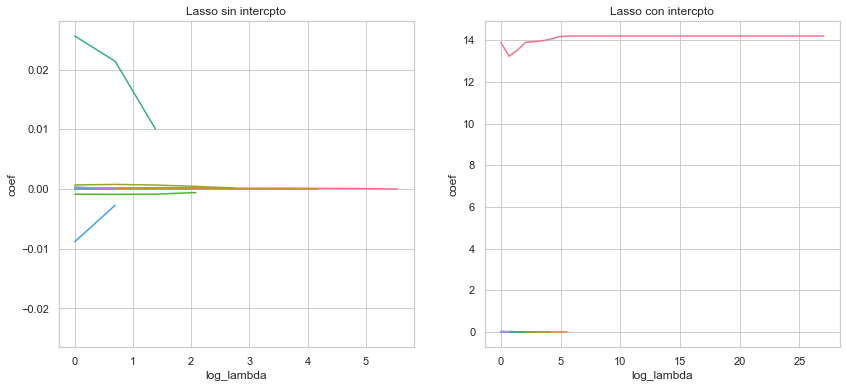

In [98]:
fig, axs = plt.subplots(1,2, figsize=(14,6))


sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso[results_lasso["term"]!="intercept"],
    legend=None,
    ax=axs[0]
)
axs[0].set_title("Lasso sin intercpto")

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso,
    legend=None,
    ax=axs[1]
)
axs[1].set_title("Lasso con intercpto")

Veamos un poco mejor aquellas variables que sobreviven para mayores valores de lambda ¿Qué tienen en común todas estas variables?



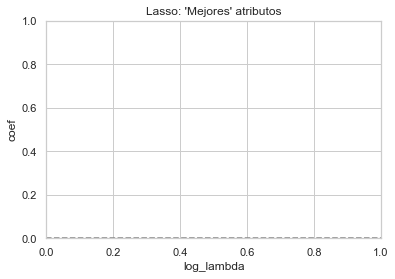

In [99]:


sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso[(results_lasso["log_lambda"] >16.5) & (results_lasso["term"] != "intercept")],
)

plt.axhline(y=0, c="grey", ls="--")
plt.title("Lasso: 'Mejores' atributos")
plt.show()

Vemos que las variables que “sobreviven” para mayores valores de lambda son las que están medidas con una escala mayor. => Necesidad de estandarizar 

## Lasso estandarizado


In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)

In [101]:
lambdas = [2**i for i in range(40)]

lambdas_list = []
term_list = []
coef_list = []


for lambda_ in lambdas:

    lasso = Lasso(alpha=lambda_, max_iter=2000)
    lasso.fit(X_train_scaled, y_train)
    coefs = lasso.coef_
    features = lasso.feature_names_in_

    terms = features[coefs!=0]
    coefs = coefs[coefs!=0]

    term_list.extend(terms)
    coef_list.extend(coefs)    
    term_list.append("intercept")
    coef_list.append(lasso.intercept_)
    lambdas_list.extend([lambda_]*(len(coefs)+1))

In [102]:
results_lasso_scaled = pd.DataFrame({
    "lambda":lambdas_list,
    "term": term_list,
    "coef": coef_list  
}).sort_values(by="lambda", ascending=False).reset_index(drop=True)

results_lasso_scaled["log_lambda"] = np.log(results_lasso_scaled["lambda"])

In [103]:
results_lasso_scaled.iloc[:22]

lambda       term       coef  log_lambda
0   549755813888  intercept  14.204848   27.032740
1   274877906944  intercept  14.204848   26.339593
2   137438953472  intercept  14.204848   25.646446
3    68719476736  intercept  14.204848   24.953299
4    34359738368  intercept  14.204848   24.260151
5    17179869184  intercept  14.204848   23.567004
6     8589934592  intercept  14.204848   22.873857
7     4294967296  intercept  14.204848   22.180710
8     2147483648  intercept  14.204848   21.487563
9     1073741824  intercept  14.204848   20.794415
10     536870912  intercept  14.204848   20.101268
11     268435456  intercept  14.204848   19.408121
12     134217728  intercept  14.204848   18.714974
13      67108864  intercept  14.204848   18.021827
14      33554432  intercept  14.204848   17.328680
15      16777216  intercept  14.204848   16.635532
16       8388608  intercept  14.204848   15.942385
17       4194304  intercept  14.204848   15.249238
18       2097152  intercept  14.204848   14.556091
19       1048576  intercept  14.204848   13.862944
20        524288  intercept  14.204848   13.169796
21        262144  intercept  14.204848   12.476649

Text(0.5, 1.0, 'Lasso estandarizado con intercpto')

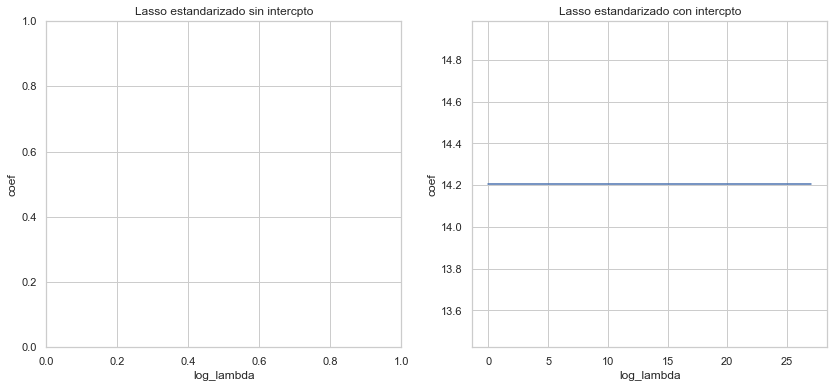

In [104]:
fig, axs = plt.subplots(1,2, figsize=(14,6))


sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso_scaled[results_lasso_scaled["term"]!="intercept"],
    legend=None,
    ax=axs[0]
)
axs[0].set_title("Lasso estandarizado sin intercpto")

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso_scaled,
    legend=None,
    ax=axs[1]
)
axs[1].set_title("Lasso estandarizado con intercpto")

Veamos ahora cuáles variables sobreviven para mayores valores de lambda.



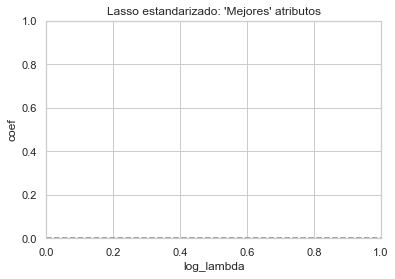

In [105]:


sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso_scaled[(results_lasso_scaled["log_lambda"] >13) & (results_lasso_scaled["term"] != "intercept")],
)

plt.axhline(y=0, c="grey", ls="--")
plt.title("Lasso estandarizado: 'Mejores' atributos")
plt.show()

Observamos que ahora tenemos otro set de “mejores” variables.

¿Podemos decidir cuál es el valor óptimo de lambda?



### Elección del lambda óptimo


Para elegir el valor óptimo de lambda, lo común es realizar cross-validation.


In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [107]:
lasso = Lasso()

# Define the grid of hyperparameters to search over
param_grid = {
    'alpha': lambdas
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                   2048, 4096, 8192, 16384, 32768, 65536,
                                   131072, 262144, 524288, 1048576, 2097152,
                                   4194304, 8388608, 16777216, 33554432,
                                   67108864, 134217728, 268435456, 536870912, ...]},
             scoring='neg_mean_squared_error')

In [108]:
results_cv_lasso = pd.DataFrame(grid_search.cv_results_)
results_cv_lasso["log_lambda"] = np.log(results_cv_lasso["param_alpha"].astype(float))
results_cv_lasso["mean_cv_score"] = results_cv_lasso["mean_test_score"] * (-1)

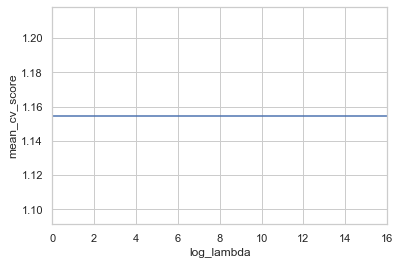

In [109]:

sns.lineplot(
    x="log_lambda",
    y="mean_cv_score",
    data=results_cv_lasso

)

plt.xlim(0,16)
plt.show()


In [110]:
results_cv_lasso.loc[results_cv_lasso["mean_cv_score"] == results_cv_lasso["mean_cv_score"].min(),  ["log_lambda", "param_alpha", "mean_cv_score"]]

log_lambda   param_alpha  mean_cv_score
0     0.000000             1        1.15471
1     0.693147             2        1.15471
2     1.386294             4        1.15471
3     2.079442             8        1.15471
4     2.772589            16        1.15471
5     3.465736            32        1.15471
6     4.158883            64        1.15471
7     4.852030           128        1.15471
8     5.545177           256        1.15471
9     6.238325           512        1.15471
10    6.931472          1024        1.15471
11    7.624619          2048        1.15471
12    8.317766          4096        1.15471
13    9.010913          8192        1.15471
14    9.704061         16384        1.15471
15   10.397208         32768        1.15471
16   11.090355         65536        1.15471
17   11.783502        131072        1.15471
18   12.476649        262144        1.15471
19   13.169796        524288        1.15471
20   13.862944       1048576        1.15471
21   14.556091       2097152        1.15471
22   15.249238       4194304        1.15471
23   15.942385       8388608        1.15471
24   16.635532      16777216        1.15471
25   17.328680      33554432        1.15471
26   18.021827      67108864        1.15471
27   18.714974     134217728        1.15471
28   19.408121     268435456        1.15471
29   20.101268     536870912        1.15471
30   20.794415    1073741824        1.15471
31   21.487563    2147483648        1.15471
32   22.180710    4294967296        1.15471
33   22.873857    8589934592        1.15471
34   23.567004   17179869184        1.15471
35   24.260151   34359738368        1.15471
36   24.953299   68719476736        1.15471
37   25.646446  137438953472        1.15471
38   26.339593  274877906944        1.15471
39   27.032740  549755813888        1.15471

In [111]:
results_lasso_scaled[results_lasso_scaled["lambda"]==131072]

lambda       term       coef  log_lambda
22  131072  intercept  14.204848   11.783502

In [112]:
best_lasso = grid_search.best_estimator_
print(best_lasso)

Lasso(alpha=1)


## Ridge

In [113]:
from sklearn.linear_model import Ridge

In [114]:
lambdas = [2**i for i in range(40)]

lambdas_list = []
term_list = []
coef_list = []


for lambda_ in lambdas:

    ridge = Ridge(alpha=lambda_, max_iter=2000)
    ridge.fit(X_train_scaled, y_train)
    coefs = ridge.coef_
    features = ridge.feature_names_in_

    terms = features[coefs!=0]
    coefs = coefs[coefs!=0]

    term_list.extend(terms)
    coef_list.extend(coefs)    
    term_list.append("intercept")
    coef_list.append(ridge.intercept_)
    lambdas_list.extend([lambda_]*(len(coefs)+1))

Text(0.5, 1.0, 'Ridge estandarizado con intercpto')

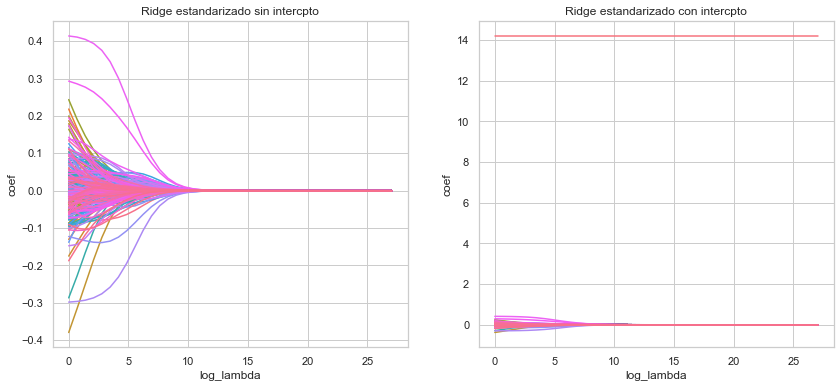

In [115]:
results_ridge_scaled = pd.DataFrame({
    "lambda":lambdas_list,
    "term": term_list,
    "coef": coef_list  
}).sort_values(by="lambda", ascending=False).reset_index(drop=True)

results_ridge_scaled["log_lambda"] = np.log(results_ridge_scaled["lambda"])
fig, axs = plt.subplots(1,2, figsize=(14,6))


sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_ridge_scaled[results_ridge_scaled["term"]!="intercept"],
    legend=None,
    ax=axs[0]
)
axs[0].set_title("Ridge estandarizado sin intercpto")

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_ridge_scaled,
    legend=None,
    ax=axs[1]
)
axs[1].set_title("Ridge estandarizado con intercpto")

#### Lambda óptimo

In [116]:
ridge = Ridge()

# Define the grid of hyperparameters to search over
param_grid = {
    'alpha': lambdas
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                   2048, 4096, 8192, 16384, 32768, 65536,
                                   131072, 262144, 524288, 1048576, 2097152,
                                   4194304, 8388608, 16777216, 33554432,
                                   67108864, 134217728, 268435456, 536870912, ...]},
             scoring='neg_mean_squared_error')

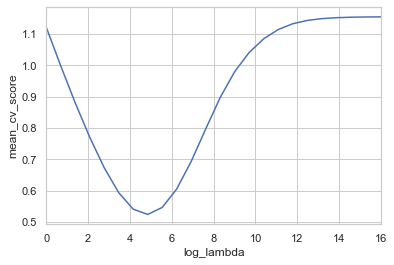

In [117]:
results_cv_ridge = pd.DataFrame(grid_search.cv_results_)
results_cv_ridge["log_lambda"] = np.log(results_cv_ridge["param_alpha"].astype(float))
results_cv_ridge["mean_cv_score"] = results_cv_ridge["mean_test_score"] * (-1)
sns.lineplot(
    x="log_lambda",
    y="mean_cv_score",
    data=results_cv_ridge
)

plt.xlim(0,16)
plt.show()


In [118]:
results_cv_ridge.loc[results_cv_ridge["mean_cv_score"] == results_cv_ridge["mean_cv_score"].min(),  ["log_lambda", "param_alpha", "mean_cv_score"]]

log_lambda  param_alpha  mean_cv_score
7     4.85203          128       0.523672

In [119]:
best_ridge = grid_search.best_estimator_
print(best_ridge)

Ridge(alpha=128)


In [120]:
results_ridge_scaled[results_ridge_scaled["lambda"]==64]

lambda                        term      coef  log_lambda
9801       64         Lib_passing_Cmp_mid -0.000476    4.158883
9802       64     Lib_shooting_G_minus_xG -0.007319    4.158883
9803       64  Lib_shooting_np_G_minus_xG -0.006428    4.158883
9804       64             Lib_passing_Cmp  0.008386    4.158883
9805       64             Lib_passing_Att  0.007600    4.158883
...       ...                         ...       ...         ...
10093      64                      season  0.015703    4.158883
10094      64                      altura  0.062548    4.158883
10095      64                 cedido_last -0.124361    4.158883
10096      64                        varg -0.018885    4.158883
10097      64                        carg -0.005123    4.158883

[297 rows x 4 columns]

## Elastic Net

Elastic Net:

$$ECM + \lambda \left[ \alpha \sum_j |\beta_j| + (1-\alpha) \sum_j \beta_j^2 \right]$$


$\lambda$ controla toda la penalidad, mientras que $\alpha$ controla la penalidad de la elastic net y tiende un puente entre Lasso y Ridge.

Con el parámetro $\alpha$ indicamos con qué tipo de modelo deseamos trabajar:
* Ridge: $\alpha=0$
* Lasso: $\alpha=1$
* Elastic Net:  $0<\alpha <1$


In [121]:
from sklearn.linear_model import ElasticNet

In [122]:
lambdas = [2**i for i in range(40)]

lambdas_list = []
term_list = []
coef_list = []


for lambda_ in lambdas:

    elastic = ElasticNet(alpha=lambda_, max_iter=2000)
    elastic.fit(X_train_scaled, y_train)
    coefs = elastic.coef_
    features = elastic.feature_names_in_

    terms = features[coefs!=0]
    coefs = coefs[coefs!=0]

    term_list.extend(terms)
    coef_list.extend(coefs)    
    term_list.append("intercept")
    coef_list.append(elastic.intercept_)
    lambdas_list.extend([lambda_]*(len(coefs)+1))

Text(0.5, 1.0, 'Elastic Net estandarizado con intercpto')

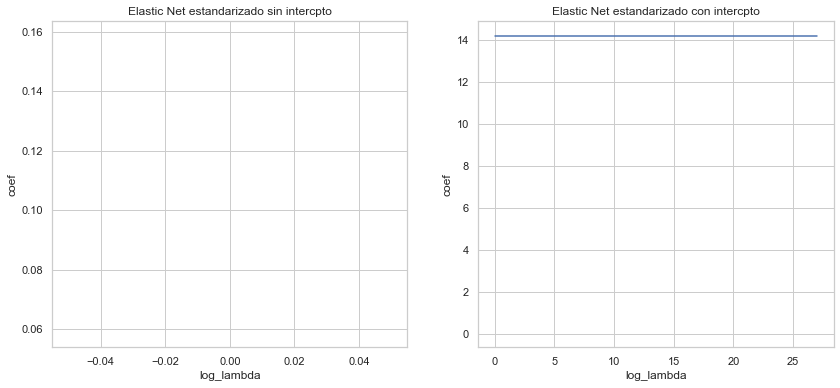

In [123]:
results_en_scaled = pd.DataFrame({
    "lambda":lambdas_list,
    "term": term_list,
    "coef": coef_list  
}).sort_values(by="lambda", ascending=False).reset_index(drop=True)

results_en_scaled["log_lambda"] = np.log(results_en_scaled["lambda"])
fig, axs = plt.subplots(1,2, figsize=(14,6))


sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_en_scaled[results_en_scaled["term"]!="intercept"],
    legend=None,
    ax=axs[0]
)
axs[0].set_title("Elastic Net estandarizado sin intercpto")

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_en_scaled,
    legend=None,
    ax=axs[1]
)
axs[1].set_title("Elastic Net estandarizado con intercpto")

### Elección de Hiperparáemtros

In [124]:
en = ElasticNet()

# Define the grid of hyperparameters to search over
param_grid = {
    'alpha': lambdas, # (lambda en la formula)
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # lasso (alpha en la formula)
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=en, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                   2048, 4096, 8192, 16384, 32768, 65536,
                                   131072, 262144, 524288, 1048576, 2097152,
                                   4194304, 8388608, 16777216, 33554432,
                                   67108864, 134217728, 268435456, 536870912, ...],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [125]:
best_elasticnet = grid_search.best_estimator_
print(best_elasticnet)

ElasticNet(alpha=1, l1_ratio=0.1)


## Testing de Modelos

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
best_lasso.fit(X_train_scaled, y_train)
best_ridge.fit(X_train_scaled, y_train)
best_elasticnet.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, l1_ratio=0.1)

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [129]:
# lm_pred = lm.predict(X_test[selected_columns])
# lm_metrica = mean_absolute_error(y_test, y_pred)
# print(f"El modelo lineal MCO obtuvo una performance de test de {lm_metrica:.1f}")

models = {
    # "modelo lineal mco": lm,
    "lasso": best_lasso,
    "ridge": best_ridge,
    "elastic net": best_elasticnet
    }


for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    metrica = mean_absolute_error(y_test, y_pred)
    print(f"El modelo {model_name} obtuvo un error absoluto medio de {metrica:.1f}")
    metrica2 = mean_squared_error(y_test, y_pred)
    print(f"El modelo {model_name} obtuvo un error cuadratico medio de {metrica2:.1f}")


El modelo lasso obtuvo un error absoluto medio de 0.9
El modelo lasso obtuvo un error cuadratico medio de 1.5
El modelo ridge obtuvo un error absoluto medio de 0.7
El modelo ridge obtuvo un error cuadratico medio de 0.7
El modelo elastic net obtuvo un error absoluto medio de 0.6
El modelo elastic net obtuvo un error cuadratico medio de 0.6


C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\Terminal-NTB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


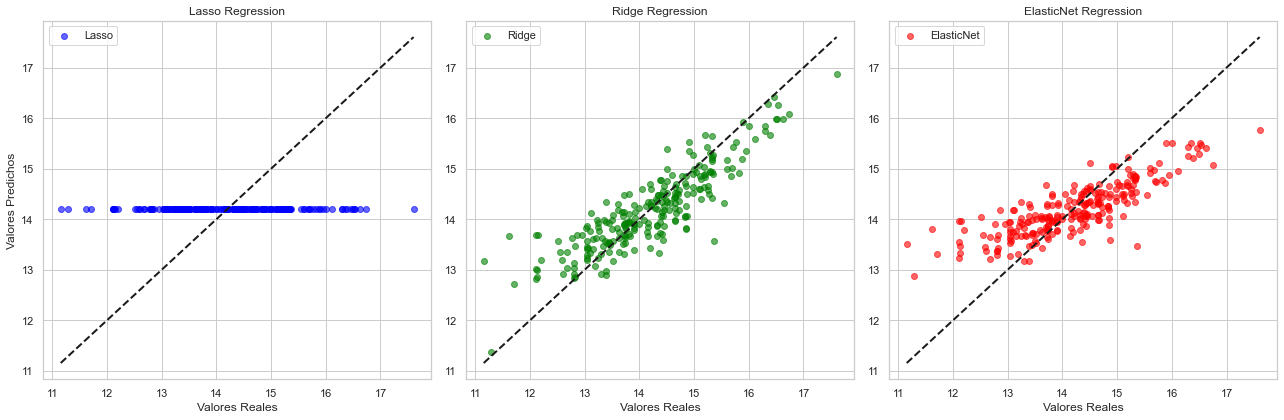

In [130]:
import matplotlib.pyplot as plt

# Predicciones de los tres modelos
y_pred_lasso = best_lasso.predict(X_train_scaled)
y_pred_ridge = best_ridge.predict(X_train_scaled)
y_pred_elasticnet = best_elasticnet.predict(X_train_scaled)

# Crear figura y subgráficos
plt.figure(figsize=(18, 6))

# Gráfico para Lasso
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_lasso, alpha=0.6, color='blue', label='Lasso')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Lasso Regression')
plt.legend()

# Gráfico para Ridge
plt.subplot(1, 3, 2)
plt.scatter(y_train, y_pred_ridge, alpha=0.6, color='green', label='Ridge')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.title('Ridge Regression')
plt.legend()

# Gráfico para ElasticNet
plt.subplot(1, 3, 3)
plt.scatter(y_train, y_pred_elasticnet, alpha=0.6, color='red', label='ElasticNet')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.title('ElasticNet Regression')
plt.legend()

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


# Modelo de prediccion de posiciones